# Taller 1:

In [ ]:
# Librerias necesarias:
import math # Para funciones matemáticas.
import numpy as np # Para trabajos con vectores.
import pandas as pd # Para realizar tablas.
from IPython.display import display # Imprimir tablas de manera llamativa.
import matplotlib.pyplot as plt # Para hacer gráficas.

## Ejercicio 3.f:

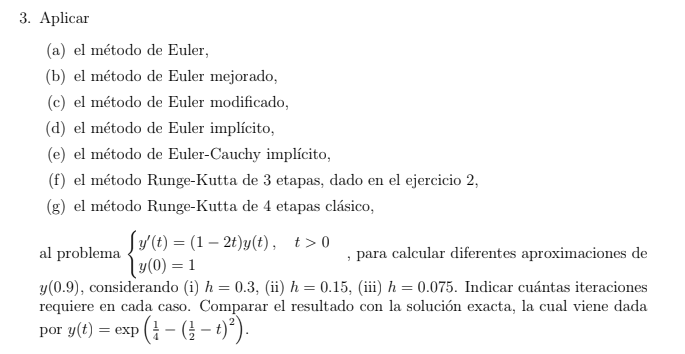

---
Ejercicio 2 que presenta el método de Runge-Kutta:
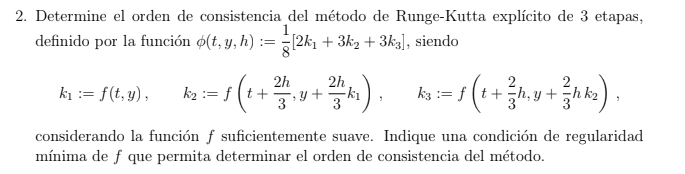

### Método de Runge-Kutta de 3 etapas:

In [ ]:
# Solución exacta.
t = 0.9 # Valor de t solicitado.
real = math.exp((1/4)-((1/2)-t)**2) # y(0.9).

# Definimos y'(t)=f(t,y(t)):
def funcion_f(t, yt):
  return (1-2*t)*yt

#
def aproximado(h, b = 0.9):
  yt = 1 #Valor inicial y(0) = 1
  n = 0  #Contador de numero de pasos
  t = 0  #Inicio del intervalo [0, 0.9]
  while n < b / h:
    t = n*h
    # Valores de K.
    k1 = funcion_f(t, yt)
    k2 = funcion_f(t + 2*h/3, yt + 2*h*k1/3)
    k3 = funcion_f(t+2*h/3, yt + 2*h*k2/3)
    O = (1/8) * (2*k1 + 3*k2 + 3*k3)
    yt = yt + O*h
    n = n + 1 # Se suma un paso más.
  return f'\n\tNumero de pasos: {n}.\n \tAproximación: {yt}.\n \tError: {abs(real - yt)}'

# Imprimimos los resultados
print("Valor real: ", real)
print('Considerando (i) h = 0.3:', aproximado(0.3))
print('Considerando (ii) h = 0.15:', aproximado(0.15))
print('Considerando (iii) h = 0.075:', aproximado(0.075))

Valor real:  1.0941742837052104
Considerando (i) h = 0.3: 
	Numero de pasos: 3.
 	Aproximación: 1.0929908991016.
 	Error: 0.001183384603610449
Considerando (ii) h = 0.15: 
	Numero de pasos: 6.
 	Aproximación: 1.0940210808116273.
 	Error: 0.00015320289358311534
Considerando (iii) h = 0.075: 
	Numero de pasos: 12.
 	Aproximación: 1.0941550274119285.
 	Error: 1.92562932819218e-05


En los resultados anteriores se presenta (1) El número de pasos requeridos para encontrar la solución. (2) La aproximación conseguida y (3) El error entre la aproximación y el valor exacto. Esto se hace para cada uno de los valores de h.

## Ejercicio 5.c:

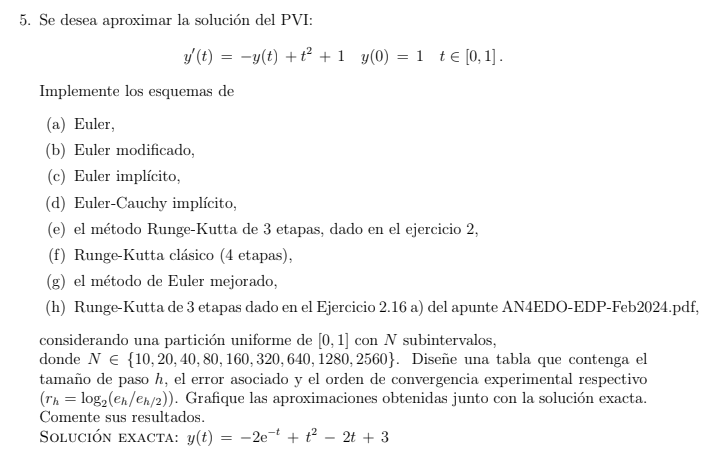

### Método de Euler implícito:

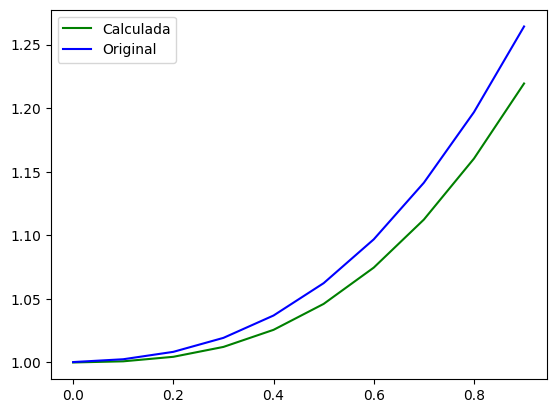


Calculo con 10 particiones:


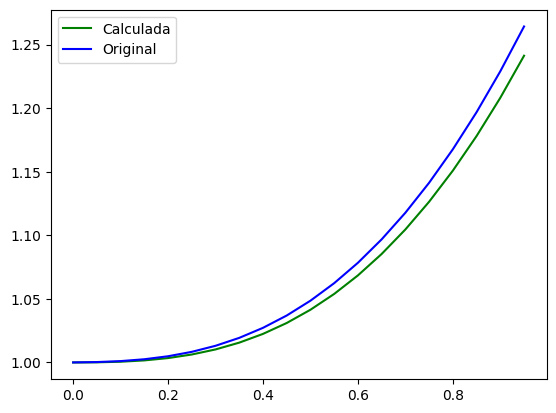


Calculo con 20 particiones:


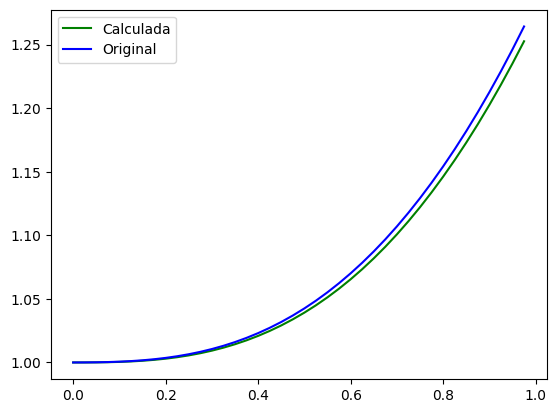


Calculo con 40 particiones:


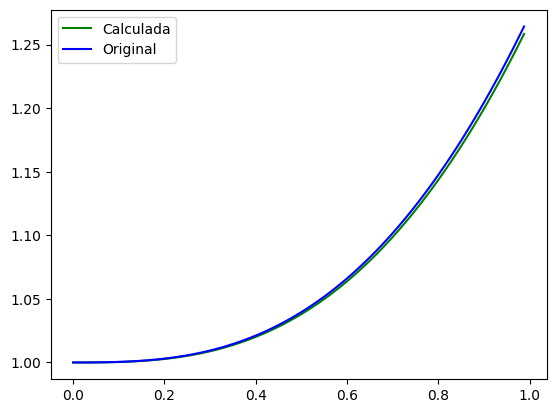


Calculo con 80 particiones:


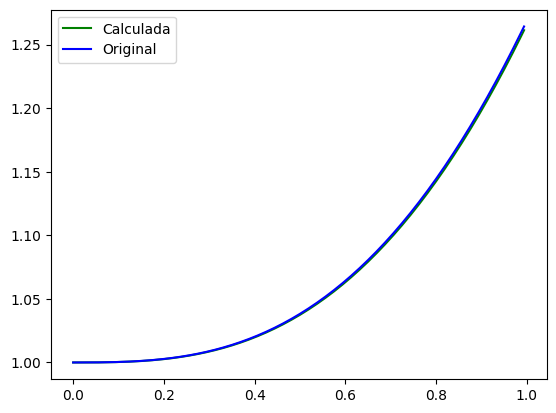


Calculo con 160 particiones:


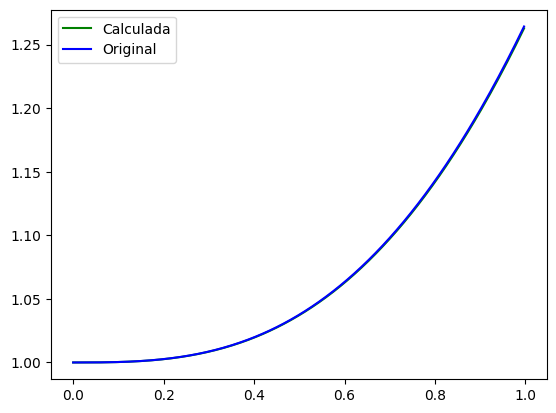


Calculo con 320 particiones:


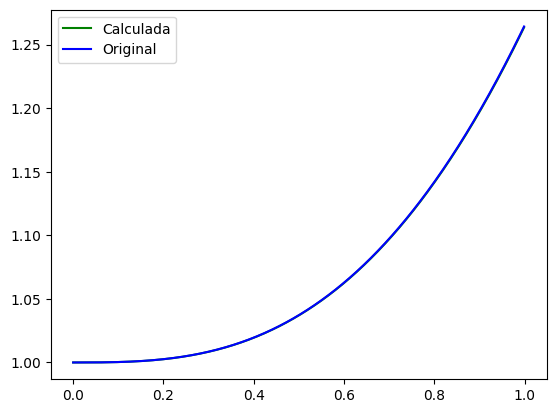


Calculo con 640 particiones:


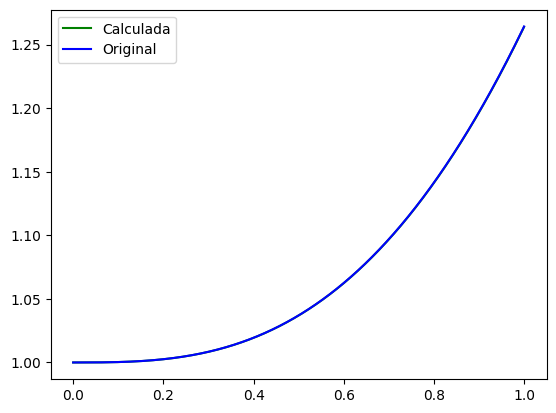


Calculo con 1280 particiones:


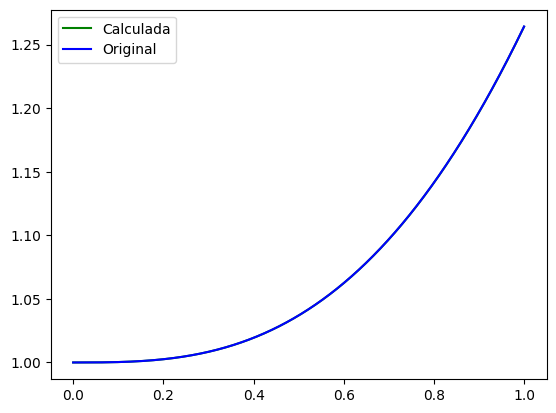


Calculo con 2560 particiones:
Tabla de los resultados para cada valor de h:


,h,Error
0,0.100000,0.044846
1,0.050000,0.022996
2,0.025000,0.011642
3,0.012500,0.005858
4,0.006250,0.002938
5,0.003125,0.001471
6,0.001563,0.000736
7,0.000781,0.000368
8,0.000391,0.000184


In [ ]:
# Número de particiones
N=10

# Se define la función que calcula una aproximación por el método implícito de Euler para un valor N dado.
def euler_implicito(N):
    # Amplitud de la particion
    h=(1-0)/N

    # Se define f(t,y(t))=-y(t)+t**2+1
    # Se toma una lista de las aproximaciones, los valores en esos puntos de la solucion exacta y los errores asociados

    aproximaciones=[1]
    solucion = [1]
    errores = [0]

    # Listas para realizar las graficas de Func. Original Vs Func. Aproximada:
    Listt=[]
    y_calculado=[]
    y_original=[]

    for j in range(N):

        t_j=0+j*h
        t_j_1=t_j+h
        # Se implementa la formula de recurrencia de la aproximacion y la agregamos a aproximaciones
        y_i=(aproximaciones[-1]+h+h*(t_j)**2)/(1+h)
        aproximaciones.append(y_i)

        # Se implementa la formula de recurrencia de la solucion exacta y la agregamos a solucion
        y_real = -2*np.e**(-t_j_1)+(t_j_1**2)-(2*t_j_1)+3
        solucion.append(y_real)

        Listt.append(t_j)
        y_calculado.append(y_i)
        y_original.append(y_real)

        # Se calcula el error y se agrega a errores
        e=abs(y_real-y_i)
        errores.append(e)
    plt.plot(Listt,y_calculado,"g")
    plt.plot(Listt,y_original,"b")
    plt.legend(["Calculada","Original"])
    plt.show()
    return h, max(errores)

# Se crea un arreglo de particiones
particiones=[10,20,40,80,160,320,640,1280,2560]

# Se crea un vector para crear la tabla
v=[]

# Se crea un ciclo para todas las particiones y los resultados se guardan en el vector que crea la tabla
for n in particiones:
    h, error=euler_implicito(n)
    v.append([h,error])
    print(f"\nCalculo con {n} particiones:")

tabla=pd.DataFrame(v)
tabla.columns = ["h","Error"]
print("Tabla de los resultados para cada valor de h:")
display(tabla)

La anterior tabla no solo presenta los resultados solicitados sino que además es interactiva para que el lector consulte otros datos relevantes.

## Ejercicio 7.b:

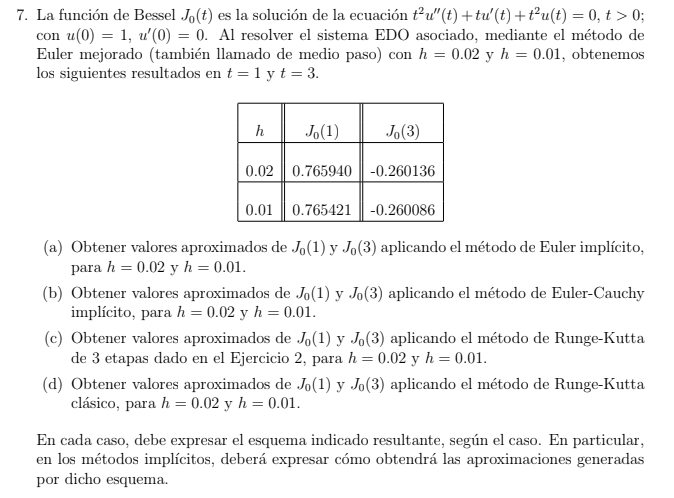

### Método de Euler-Cauchy implícito:

Para solucionar la ecuación $tu''(t)+tu'(t)+t^2u(t)=0$ con $t>0$ realizamos el siguiente reemplazo:

Sea:

$u_1(t)=u(t)$.

$u_2(t)=u'(t)=f_1(t,u_1(t))$.

Así tenemos que:     $u'_2(t)=f_2(t,u_2(t))=u''(t)=\frac{-u'(t)-tu(t)}{t}$.

Sabemos que:

$u_{1,j+1}=u_{1,j}+\frac{h}{2}[f_1(t_j,u_{1,j})+f_1(t_{j+1},u_{1,j+1})]=u_{1,j}+\frac{h}{2}[u_{2,j}+u_{2,j+1}]$.

Además:

$u_{2,j+1}=u_{2,j}+\frac{h}{2}[f_2(t_j,u_{2,j})+f_2(t_{j+1},u_{2,j+1})]=u_{2,j}+\frac{h}{2}[-\frac{u_{2,j}}{t_j}-u_{1,j}-\frac{u_{2,j+1}}{t_{j+1}}-u_{1,j+1}]$.

Reemplazando una de estas ecuaciones en la otra tenemos:

$u_{2,j+1}=u_{2,j}+\frac{h}{2}[-\frac{u_{2,j}}{t_j}-u_{1,j}-\frac{u_{2,j+1}}{t_{j+1}}-u_{1,j}-\frac{h}{2}[u_{2,j}+u_{2,j+1}].]$.

Operando y despejando $u_{2,j+1}$ obtenemos:

$u_{2,j+1}=\frac{[1-\frac{h^2}{4}-\frac{h}{2t_j}]u_{2,j}-hu_{1,j}}{1+\frac{h}{2t_{j+1}}+\frac{h^2}{4}}$.

Ya con este valor conocido podemos hallar $u(t)=u_1(t)$.

In [ ]:
# Para h=0.01.

# Valores del intervalo [a,b] para hacer la partición.
a=0
b=3
N=300 # Número de particiones.

h=(b-a)/N  # Amplitud de la particion

# Valores iniciales:
u_1_j=1
u_2_j=0

# Encabezado:
print(f"Para h={h}")

# Vamos recorriendo cada uno de las valores de la partición realizada:
for j in range(N):

  # t sub j y t sub j+1
  t_j=a+j*h
  t_j_1=a+(j+1)*h

  # calcular u_2_j+1
  u_2_j_1= ((1-((h**2)/4)-(h/2*t_j))*u_2_j-(h*u_1_j))/(1+(h/2*t_j_1)+((h**2)/4))

  # calcular u_1_j+1
  u_1_j_1=u_1_j+((h/2)*(u_2_j+u_2_j_1))

  # Mostramos resultados:
  if t_j_1==1.0 or t_j_1==3.0:
    print(f"t={t_j_1} el valor de J_0 es: {u_1_j_1}")

  # Reemplazamos los valores anteriores.
  u_1_j=u_1_j_1
  u_2_j=u_2_j_1

# Para h=0.02.

# Valores del intervalo [a,b] para hacer la partición.
a=0
b=3
N=150 # Número de particiones.

h=(b-a)/N  # Amplitud de la particion

# Valores iniciales:
u_1_j=1
u_2_j=0

# Repetimos el proceso para h=0.02:
print(f"Para h={h}")
for j in range(N):
  # t sub j y t sub j+1
  t_j=a+j*h
  t_j_1=a+(j+1)*h

  # calcular u_2_j+1
  u_2_j_1= ((1-((h**2)/4)-(h/2*t_j))*u_2_j-(h*u_1_j))/(1+(h/2*t_j_1)+((h**2)/4))

  # calcular u_1_j+1
  u_1_j_1=u_1_j+((h/2)*(u_2_j+u_2_j_1))

  # Mostramos resultados:
  if t_j_1==1.0 or t_j_1==3.0:
    print(f"t={t_j_1} el valor de J_0 es: {u_1_j_1}")

  # Reemplazamos los valores anteriores.
  u_1_j=u_1_j_1
  u_2_j=u_2_j_1

Para h=0.01
t=1.0 el valor de J_0 es: 0.6065445590147773
t=3.0 el valor de J_0 es: 0.01110962143479037
Para h=0.02
t=1.0 el valor de J_0 es: 0.6065862526156761
t=3.0 el valor de J_0 es: 0.011111496310394415


De los resultados anteriores tenemos el siguiente diagrama:

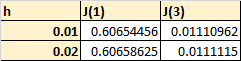

# Taller 2

In [ ]:
# Librerias necesarias:
import math # Para funciones matemáticas.
import numpy as np # Para trabajos con vectores.
import pandas as pd # Para realizar tablas.
from IPython.display import display # Imprimir tablas de manera llamativa.
import matplotlib.pyplot as plt # Para hacer gráficas.
from scipy.special import jv # Para graficar la funcion de Bessel J_0(t).
from sympy import * # Manejo de ecuaciones.

## Ejercicio 2.a.

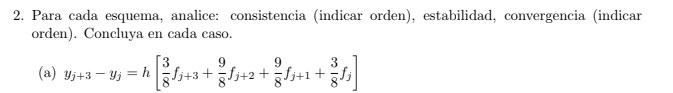

Obtenemos los polinomios caracteristicos asociados al esquema:

$$\psi(\mu)= \mu^3-1$$
$$\sigma(\mu)=\frac{3}{8}\mu^3+\frac{9}{8}\mu^2+\frac{9}{8}\mu+\frac{3}{8}$$

Empezamos con probar la consistencia, con el teorema de caracterizacíon condiciones para la consistencia de metodos multipaso lineales.

$$\psi_1(1)=1-1=0$$
$$\psi_2(\mu)=μ\psi_j'(μ)=3\mu^3$$
$$\psi_2(1)=3$$
$$\sigma_1(1)=\frac{3}{8}+\frac{9}{8}+\frac{9}{8}+\frac{3}{8}=\frac{24}{8}=3$$

Con esto tenemos que es consistente. Veamos que grado de consistencia tiene aplicando el  teorema importante 1.

In [ ]:
# Calculo de la derivada
def derivar(lista:list):
  L1=[]
  for i in range(1,len(lista)):
    L1.append(i*lista[i])
  return L1

# creamos un contador de grado de consistencia y las listas de los psi y los sigma

gradoConsistencia = 0
psi=[-1,0,0,1]
sigma=[3/8,9/8,9/8,3/8]
j=1

# se genera el ciclo con un contador que funcionará como el j
while sum([0]+derivar(psi))==j*sum(sigma): # probamos la condicion para el siguiente j
  # determinamos los nuevos valores
  j+=1
  psi=[0]+derivar(psi)
  sigma=[0]+derivar(sigma)
  # contamos el grado de consistencia
  gradoConsistencia += 1

print("el grado de consistencia del ejercicio es: ", gradoConsistencia)

el grado de consistencia del ejercicio es:  4


Probemos estabilidad con respecto a la condición de la raiz, recordando que
$$\psi_1(\mu)= \mu^3-1$$

Asi, buscamos las raices del anterior polinomio, por diferencia de cubos sabemos que:
$$\mu^3-1=(\mu-1)(\mu^2+\mu+1)=(\mu-1)(\mu-\frac{-1+\sqrt{3}i}{2})(\mu-\frac{-1-\sqrt{3}i}{2})$$

$\mu = 1 $ es claramente una raiz que cae dentro del circulo unitario. Veamos las otras dos raices.

$|\frac{-1+\sqrt{3}i}{2}|=(-0.5)^2+(\frac{\sqrt{3}}{2})^2=1$
$|\frac{-1-\sqrt{3}i}{2}|=(-0.5)^2+(\frac{-\sqrt{3}}{2})^2=1$

Con esto, se cumple el criterio de la raiz y por tanto es cero estable.

Veamos si es convergente. Por el teorema de Dahlquist, como sabemos que es consistente y cero estable, entonces es convergente. Veamos el orden de convergencia, por el teorema de la primera barrera de Dahlquist se sabe que el orden $p \leq 3+1=4$

## Ejercicio 3:

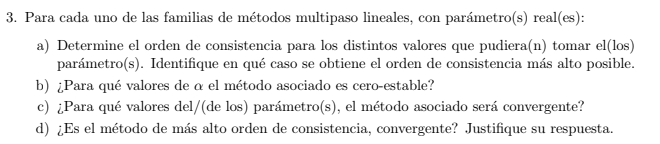



---


Consideremos un método multipaso lineal de la forma:

$\sum_{m=0}^r\alpha_m\mu^m=h\sum_{m=0}^r\beta_mf_{j+m}$.

Definimos:

$\psi(\mu)=\sum_{m=0}^r\alpha_m\mu^m$.

$\sigma(\mu)=\sum_{m=0}^r\beta_mf_{j+m}$.

Tenemos además que $\psi_{j+1}(\mu)=\mu\psi_j'$ y $\sigma_{j+1}(\mu)=\mu\sigma_j'$ donde $\psi_1(\mu)=\psi(\mu)$ y $\sigma_1(\mu)=\sigma(\mu)$.

Para verificar si el sistema es consistente de orden $k$ se debe cumplir dos condiciones:

1. $\psi_1(1)=0$.  

2.  Para $j\in\{1,...,k\}, \psi_{j+1}(1)=j\sigma_j(1)$.

Este procedimiento lo haremos usando la siguiente función, la cual arroja el mayor orden de consistencia de un MML dado:

In [ ]:
# Consistencia:
def OrdenConsNum(psi_1,sigma_1):
  # Guardaremos los valores en una lista:
  psiFuncs = [psi_1]
  sigmaFuncs = [sigma_1]
  orden=0

  while True:
    # Evaluamos la primera condición:
    if psiFuncs[0].subs(x,1) != 0:
      break

    # Evaluamos la segunda condición:
    # Sacamos las funciones anteriores:
    psi_j = psiFuncs[-1]
    sigma_j = sigmaFuncs[-1]

    # Se calcula el siguiente de psi_j:
    psi_j_1 = x*diff(psi_j,x)

    # Volvemos este resultado un número o lo metemos en variables para hacer la comparación:
    ladoIzq=psi_j_1.subs(x,1)
    ladoDer=(orden+1)*sigma_j.subs(x,1)

    try:
      float(psi_j_1.subs(x,1))
      float((orden+1)*sigma_j.subs(x,1))
    except: pass
    else:
      ladoIzq=round(psi_j_1.subs(x,1),2)
      ladoDer=round((orden+1)*sigma_j.subs(x,1),2)

    # Evaluamos si falla la condición de consistencia para el orden (orden+1):
    if ladoIzq != ladoDer:
      print(f"El sistema no es de orden {orden+1} ya que {ladoIzq} es diferente a {ladoDer}")
      break
    else:
      # Como cumple la condición de consistencia actualizamos la variable:
      orden = orden + 1

      # Calculamos el siguiente de sigma_j:
      sigma_j_1 = x*diff(sigma_j,x)
      sigmaFuncs.append(sigma_j_1)
      psiFuncs.append(psi_j_1)
  return orden

Para estudiar la cero estabilidad de los métodos multipasos, tenemos que el polinomio $\psi(\mu)$ debe satisfacer el criterio de la raíz, es decir, todas sus raíces caen dentro o sobre la circunferencia unitaria. Para esto usaremos la siguiente función:

In [ ]:
def cero_estable(psi,grado):
  raices=solve(psi,x) # Calculamos las reices del polinomio:
  # Generamos las inequaciones que nos permiten acotar las raices (solo se tiene en cuenta polinios de grado 2 y 3):
  if grado==2:
    inq1=abs(raices[0])<=1
    inq2=abs(raices[1])<=1
    # Solucionamos:
    solution = solve_univariate_inequality(inq1, a) and solve_univariate_inequality(inq2, a)
  else:
    inq1=abs(raices[0])<=1
    inq2=abs(raices[1])<=1
    inq3=abs(raices[2])<=1
    # Solucionamos:
    solution = solve_univariate_inequality(inq1, a) and solve_univariate_inequality(inq2, a) and solve_univariate_inequality(inq3, a)
  return solution

Recordemos ahora que para los MML, tenemos que:

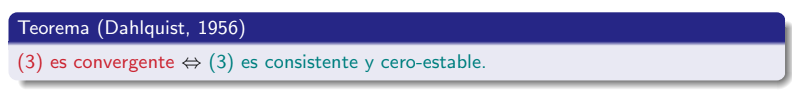

Por medio de este teorema estudiaremos la convergencia de los métodos.

---

### Númeral 3.1:
$y_{j+3}+\alpha(y_{j+2}-y_{j+1})-j_j=h(\beta f_{j+2}+f_{j+1})$, con $j\geq 0.$

**a) Consistencia:**

Para hallar el orden de consistencia y las valores de los parámetros reales, primero introducimos, utilizando los coeficientes que definen MML los llamados "Polinomios característicos" asociados a $(3,1)$ :

$$
\begin{aligned}
& \psi_{1}(\mu):=\mu^{3}+\alpha\left(\mu^{2}-\mu\right)-1 \\
& \sigma_{1}(\mu):=\beta\left(\mu^{2}+\mu\right)
\end{aligned}
$$

Ahora Introducimos la familia de polinomios:

$$
\psi_{j+i}(\mu):=\mu \psi_{j}^{\prime}(\mu), \quad \sigma_{j+1}(\mu):=\mu \sigma_{j}^{\prime}(\mu) \quad \forall j \in \mathbb{N}
$$

El método multi-paso lineal, tiene orden de consistencia al meros $k \in \mathbb{N}$, si:

(a) $\psi_{1}(1)=0$

(b) $\forall_{j} \in\{1, \ldots, k\}: \psi_{j+1}(1)=j \sigma_{j}(1)$

Se sigue en nuestro caso:

$$
\begin{aligned}
\psi_{1}(\mu) & =\mu^{3}+\alpha\left(\mu^{2}-\mu\right)-1 \\
\psi_{1}(1) & =1^{3}+\alpha\left(1^{2}-1\right)-1 \\
& =1-1+\alpha(0) \\
& =0 \text { se cumple }(a) .
\end{aligned}
$$

Luego:

$$
\begin{aligned}
\psi_{2}=\mu \psi_{1}^{\prime}(\mu) & =\mu\left(3 \mu^{2}+\alpha(2 \mu-1)\right) \\
& \left.=3 \mu^{3}+\alpha\left(2 \mu^{2}-\mu\right)\right) \\
\psi_{2}(1) & =3+\alpha(2-1) \\
& =3+\alpha
\end{aligned}
$$

$$
\begin{aligned}
\sigma_{1}(\mu) & =\beta\left(\mu^{2}+\mu\right) \\
\sigma_{1}(1) & =\beta(1+1) \\
& =\alpha \beta
\end{aligned}
$$

y ya que:

$$
\begin{aligned}
\psi_{2}(1) & =1 \sigma_{1}(1) \\
3+\alpha & =2 \beta \\
\alpha & =2 \beta-3
\end{aligned}
$$

Se concluye que en el caso (orden) $1$, $\alpha$ toma el valor de $2 \beta-3$, se sigue con el orden $2$ :

$$
\psi_{2+1}=\psi_{3}(\mu)=\mu \psi_{2}^{\prime}(\mu)
$$

$$
\begin{aligned}
\mu \psi_{2}^{\prime}(\mu) & =\mu\left(9 \mu^{2}+\alpha(4 \mu-1)\right. \\
& =9 \mu^{3}+\alpha\left(4 \mu^{2}-\mu\right) \\
\psi_{3} & =9+\alpha(3) \\
& =9+(2 \beta-3)(3) \quad(\alpha=2 \beta-3) \\
& =6 \beta \\
\sigma_{2}=\mu \sigma_{1}^{\prime}(\mu) & =\mu(\beta(2 \mu+1)) \\
& =\beta\left(2 \mu^{2}+\mu\right) \\
\sigma_{2}(1) & =\beta(3)
\end{aligned}
$$

Ahora bien:

$$
\begin{gathered}
\psi_{3}(1)=2 \sigma_{2}(1) \\
6 \beta=2(3 \beta) \\
\beta=\beta
\end{gathered}
$$

Se concluye de este proceso que se cumple la igualdad, se sigue con el orden $3$:

$$
\begin{aligned}
\psi_{4}=\mu \psi_{3}^{\prime}(\mu) & =\mu\left(27 \mu^{2}+a(8 \mu-1)\right) \\
& =27 \mu^{3}+\alpha\left(8 \mu^{2}-\mu\right) \\
\psi_{4}(1) & =27+(2 \beta-3)(7) \\
& =6+14 \beta \\
\sigma_{3}=\mu \sigma_{2}^{\prime}(\mu) & =\mu(\beta(4 \mu+1)) \\
& =\beta\left(4 \mu^{2}+\mu\right) \\
\sigma_{3}(1) & =5 \beta
\end{aligned}
$$

Luego:

$$
\begin{aligned}
& \psi_{4}(1)=3 \sigma_{3}(1) \\
& 6+14 \beta=15 \beta \\
& 6=\beta
\end{aligned}
$$

Se puede ver que $\beta$ toma el valor de 6 y ya

que $\alpha=2 \beta-3$ se remplaza llegando asi a que

$$
\alpha=9
$$

y con estos valores ya determinados se puede segir la secuencia (esta vez con un codigo) para hallar el orden de consistencia:

In [ ]:
x = symbols('x')

psi_1 = x**3 + 9 * x**2 - 9 * x - 1
sigma_1 = 6 * x**2 + 6 * x

print(f"Orden de consistencia: {OrdenConsNum(psi_1,sigma_1)}")

El sistema no es de orden 5 ya que 522 es diferente a 510
Orden de consistencia: 4


Siendo 4 el orden de consistencia mas alto posible tomando: $$\alpha = 9$$ $$\beta = 6$$

**b) Cero estabilidad:**

Sea $q$ un polinomio. Se dice que $q$ satisface el criterio de la raíz si todas sus raíces caen dentro o sobre el círculo unitario, siendo aquellas que caen en la circunferencia unitaria, raíces simples. Es decir:

a) $\forall \mu \in \mathbb{C}: q(\mu)=0 \Rightarrow|\mu| \leq 1$,

b) $\forall \mu \in \mathbb{C}: q(\mu)=0:\left(|\mu|=1 \Rightarrow q^{\prime}(\mu) \neq 0\right)$.

Cero estabilidad

El método multipaso se dice que es cero-estable si su primer polinomio característico, $\psi_1$, satisface la condición de la raíz.

\begin{aligned}
\psi_{1}(\mu) & =\mu^{3}+\alpha\left(\mu^{2}-\mu\right)-1 \\
\end{aligned}


In [ ]:
a=symbols("a")
q= (x**3) + a * (x**2 - x) - 1
raices = solve(q,x) # Se hallan las raices del polinomio caracteristico q
for i in range(len(raices)):
  inq1=abs(raices[i])<=1 # Para cada raiz se resuelve "a" de forma que el valor este pertenesca al intervalo [-1,1]
  solution1 = solve_univariate_inequality(inq1, a)
  print((raices[i], solution1))

(1, (-oo < a) & (a < oo))
(-a/2 - sqrt(a**2 + 2*a - 3)/2 - 1/2, (-oo < a) & (a <= 1))
(-a/2 + sqrt(a**2 + 2*a - 3)/2 - 1/2, (-3 <= a) & (a < oo))


El mètodo asociado es cero-estable cuando:  $$\alpha \in [-3, 1]$$

**c) Convergencia:**

El esquema multipaso lineal será consistente si y sólo si
$$
\psi_1(1)=0 \wedge \psi_2(1)=\sigma_1(1)
$$

Es convergente $\Leftrightarrow$ Es consistente y cero-estable.

Se sabe que:
$$\alpha  =2 \beta-3$$

los valores en los que es cero-estable y consistencia son:
$$\alpha \in [-3, 1] \wedge \beta \in [0, 2]$$

**d)** No será convergente cuando es consistente de mayor orden (es decir, 4) ya que para que sea consistente de orden 4 es necesario que $\alpha=9$, y $9\notin[-3,1]$, así que no será cero-estable.

### Númeral 3.4:
$y_{j+2}-2\alpha y_{j+1}+ (2\alpha-1)j_j=h[\alpha f_{j+2}+ (2-3\alpha)f_{j+1}]$, con $j\geq 0.$



--------



Definimos las funciones:

$\psi(\mu)=\mu^2-2\alpha\mu+2\alpha-1$.

$\sigma(\mu)=\alpha\mu^2+(2-3\alpha)\mu$.

In [ ]:
x = symbols('x')
a = symbols('a')
# Definimos las funciones:
psi_1 = (x**2)-(2*a*x) + (2*a) -1
sigma_1 = (a*(x**2))+(2*x)-(3*a*x)

**a) Consistencia:**

In [ ]:
print(f"Orden de consistencia: {OrdenConsNum(psi_1,sigma_1)}")

El sistema no es de orden 3 ya que 8 - 2*a es diferente a 3*a + 6
Orden de consistencia: 2


Como se logra ver, considerando $\alpha\in\mathbb{R}$ arbitrario, tenemos que el sistema tiene consistencia 2 ya que en general $8-2\alpha$ no es igual a $3\alpha+6,$ realizando el despeje del valor que necesita tomar $\alpha$ tenemos:

$8-2\alpha=3\alpha+6 \Longrightarrow 8-6=3\alpha+2\alpha \Longrightarrow \alpha=\frac{2}{5}$.

In [ ]:
#Si a=2/5:
psi_con_valor_a = (x**2)-(2*(2/5)*x) + (2*(2/5)) -1
sigma_con_valor_a = ((2/5)*(x**2))+(2*x)-(3*(2/5)*x)
print(f"Orden de consistencia: {OrdenConsNum(psi_con_valor_a,sigma_con_valor_a)}")

El sistema no es de orden 4 ya que 15.20 es diferente a 16.0000000000000
Orden de consistencia: 3


En conclusión, el sistema tiene orden de consistencia 2 con $\alpha\in\mathbb{R}$ y orden de consistencia 3 con $\alpha=\frac{2}{5}$.

**b) Cero estabilidad:**

In [ ]:
print(f"Para que el sistema sea cero estable, los intervalos de a son: {cero_estable(psi_1,2)}")

Para que el sistema sea cero estable, los intervalos de a son: (0 <= a) & (a <= 1)


Así, la cero estabilidad se tiene cuando $\alpha\in[0,1]$.

**c) Convergencia:**

El sistema es convergente donde sea cero estable y consistente, así:

*   El sistema es convergente de orden 2 donde $\alpha\in[0,1]$.
*   El sistema es convergente de orden 2 donde $\alpha=\frac{2}{5}$.

**d)** En conclusión, se tiene que en el mayor orden de consistencia (que es 3), el sistema si es convergente, ya que en dicho punto es cero estable.



## Ejercicio 4:

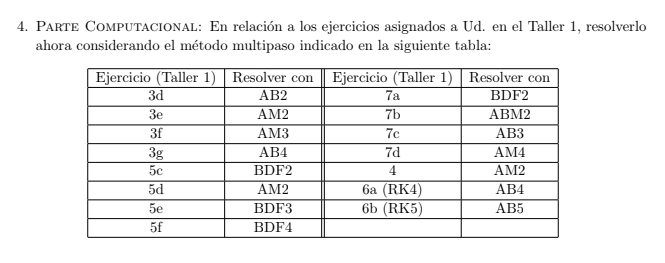

### Numeral 3.f con AM3:

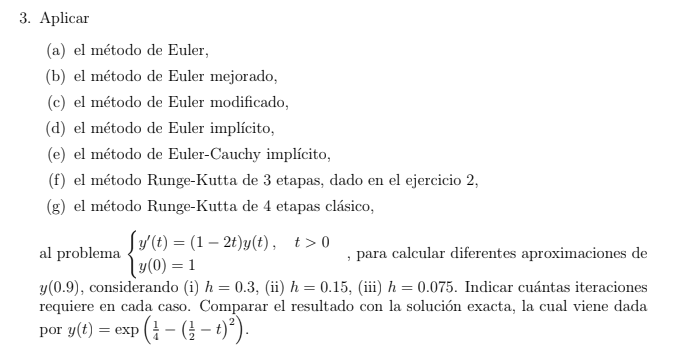
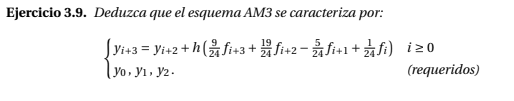

Tenemos que, $f(t,y_t)=y_t'=(1-2t)y_t$.

El método de Adams-Moulton es un método implícito y requiere algunos valores iniciales para comenzar, usaremos el método de Runge-Kutta de tres pasos para los primeros dos pasos.

Aplicaremos el método sobre el intervalo $[0,0.9]$ con diferentes valores de h, veamos la implementación de este:

Para h = 0.3, y(0.9) = 1.0772313175, error = 0.028585116378714748
Para h = 0.15, y(0.9) = 0.9338135785721711, error = 0.11483262254911408
Para h = 0.075, y(0.9) = 1.089716017868786, error = 0.041069816747500765


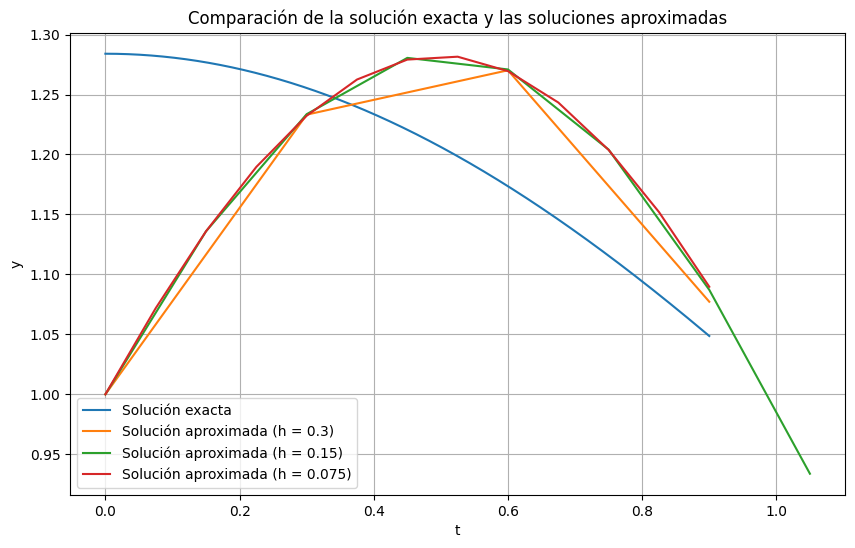

In [ ]:
# Usaremos las funciones:
def f(t, y):
    return (1 - 2*t)*y

def solucion_exacta(t):
    return np.exp(1/4 - ((1/2) * t)**2)

# Parámetros
t0, y0 = 0, 1  # Condición inicial
t_final = 0.9  # Tiempo final
h_valores = [0.3, 0.15, 0.075]  # Valores de h

# Crear una figura para la gráfica
plt.figure(figsize=(10, 6))

# Calcular y graficar la solución exacta
t_exact = np.linspace(t0, t_final, 1000)
y_exact = solucion_exacta(t_exact)
plt.plot(t_exact, y_exact, label='Solución exacta')

for h in h_valores:
    # Inicialización
    t = np.arange(t0, t_final+h, h)
    y = np.zeros_like(t)
    y[0] = y0

    # El método de Adams-Moulton es un método implícito y requiere algunos valores iniciales para comenzar:
    # Método de Runge-Kutta de tres pasos para los primeros dos pasos
    for i in range(2):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 2*h/3, y[i] + (2*h/3) * k1)
        k3 = f(t[i] + 2*h/3, y[i] + (2*h/3) * k2)
        y[i+1] = y[i] + h/8 * (2*k1 + 3*k2 + 3*k3)

    # Método de Adams-Moulton de tercer orden
    for i in range(2, len(t)-1):
        y[i+1] = y[i] + h/24 * (9*f(t[i+1], y[i]) + 19*f(t[i], y[i]) - 5*f(t[i-1], y[i-1]) + f(t[i-2], y[i-2]))

    # Graficar la solución aproximada
    print(f"Para h = {h}, y(0.9) = {y[-1]}, error = {abs(y[-1] - solucion_exacta(t_final))}")
    plt.plot(t, y, label=f'Solución aproximada (h = {h})')

# Configurar la gráfica
plt.title('Comparación de la solución exacta y las soluciones aproximadas')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### Numeral 5.c con BDF2:

Se desea aproximar la solucion del PVI: $$f(t,y(t))=y'(t) = −y(t) + t^2 + 1$$$$ y(0) = 1$$$$ t ∈ [0, 1]$$

aplicando BDF2, considerando una partici ́on uniforme de [0, 1] con N subintervalos, donde N ∈ {10, 20, 40, 80, 160, 320, 640, 1280, 2560}. Diseñe una tabla que contenga el tamaño de paso h, el error asociado y el orden de convergencia experimental respectivo
(rh = log2(eh/eh/2)). Grafique las aproximaciones obtenidas junto con la solucion exacta. Comente sus resultados.
Solucion exacta: $$y(t) = −2e^{−t} + t^2 − 2t + 3$$

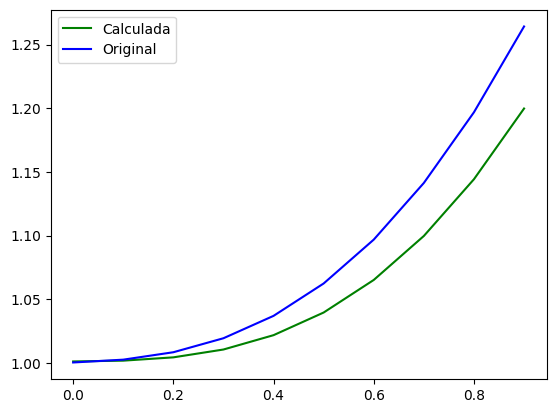

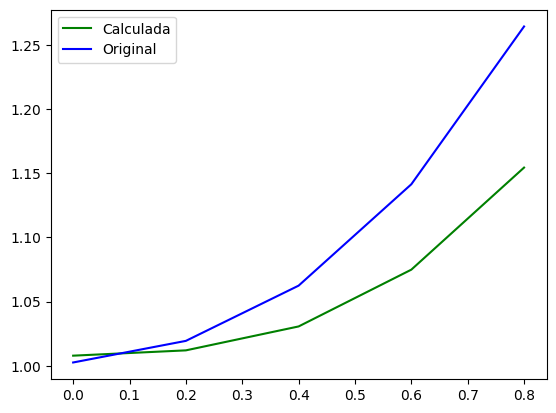


Calculo con 10 particiones:


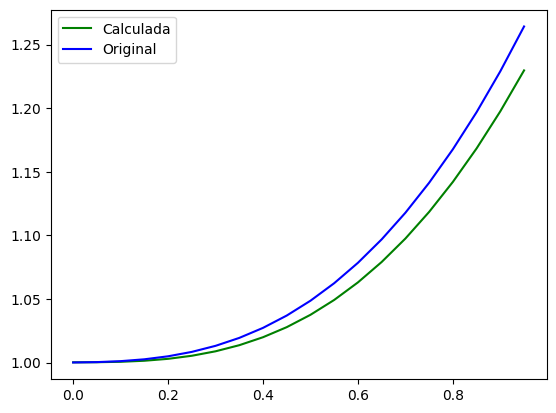

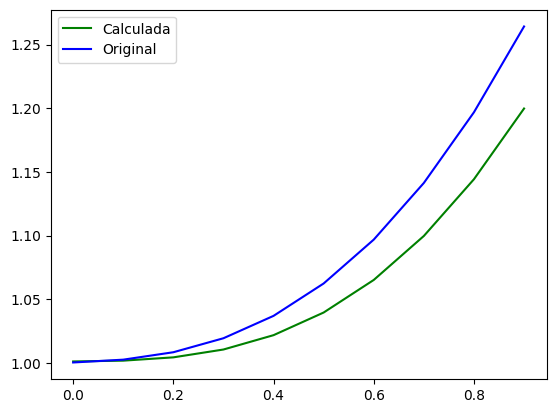


Calculo con 20 particiones:


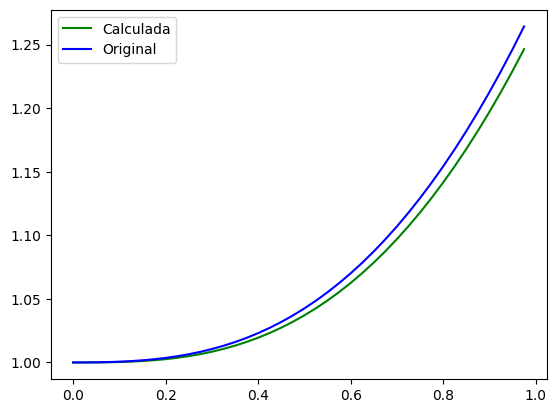

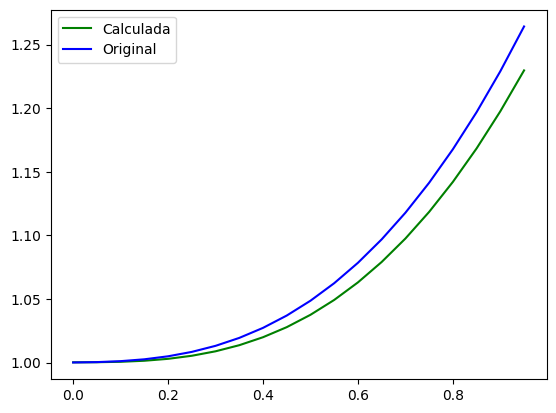


Calculo con 40 particiones:


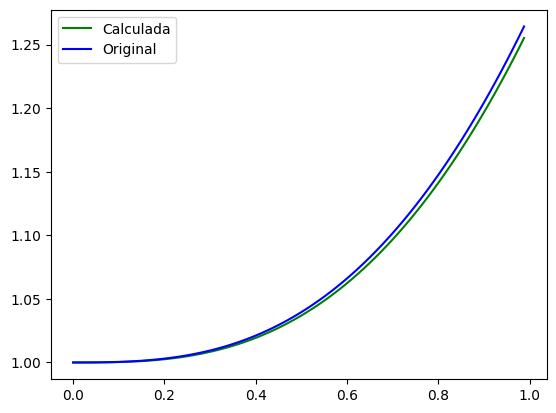

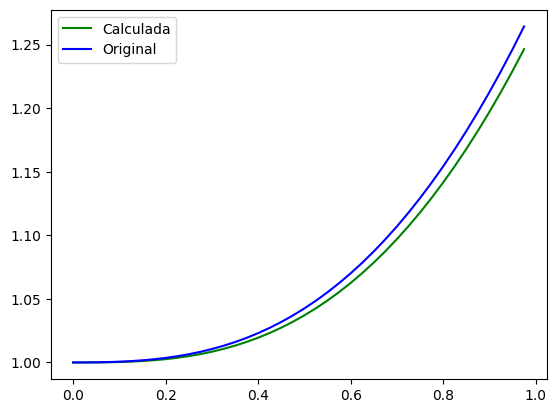


Calculo con 80 particiones:


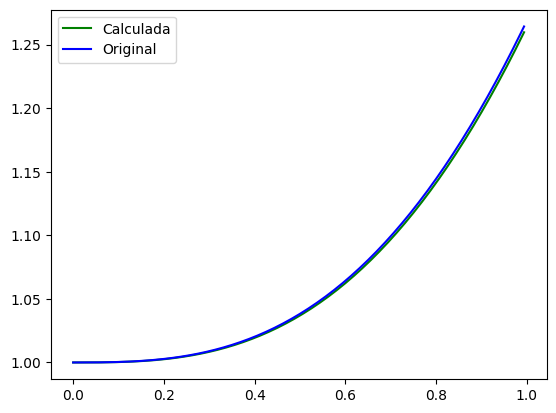

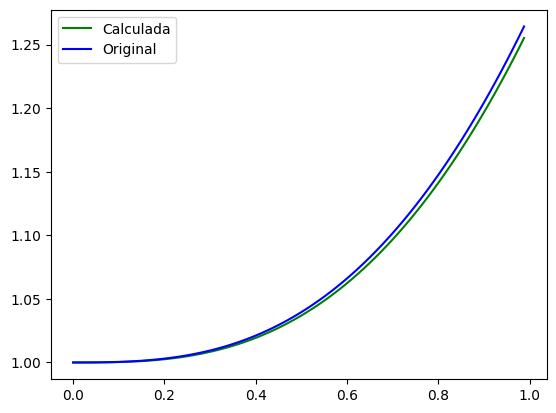


Calculo con 160 particiones:


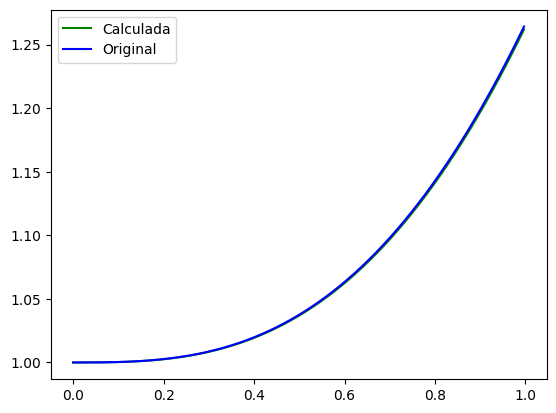

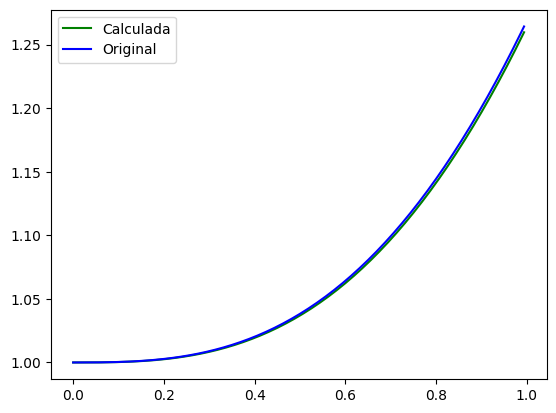


Calculo con 320 particiones:


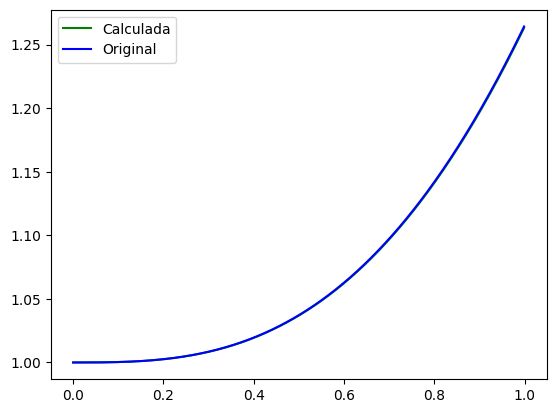

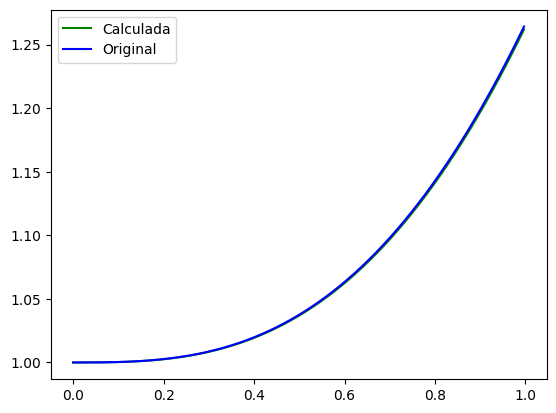


Calculo con 640 particiones:


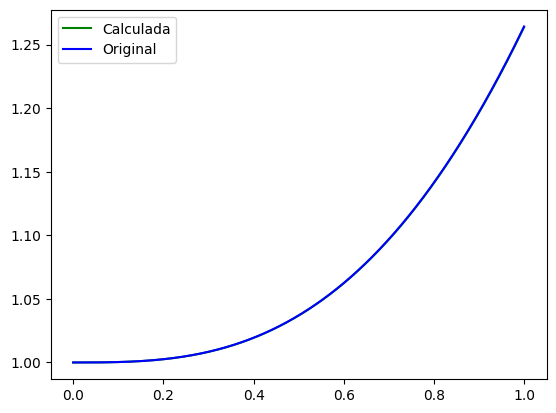

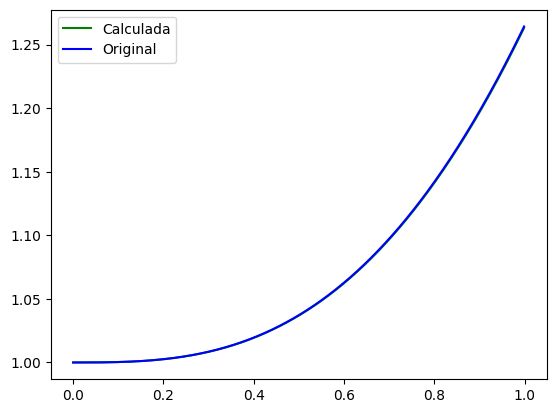


Calculo con 1280 particiones:


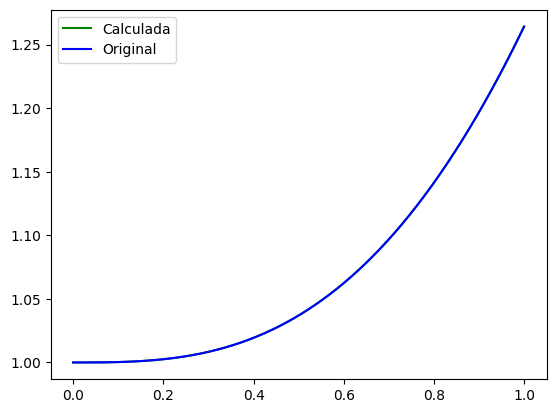

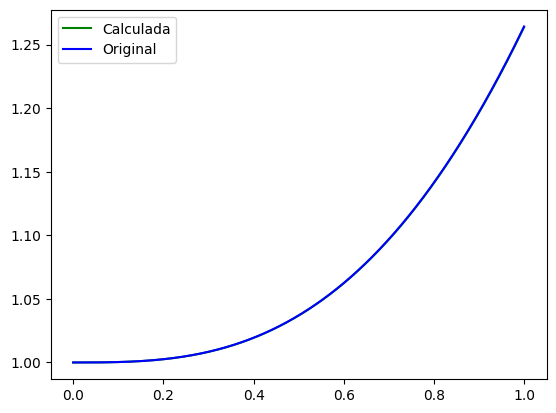


Calculo con 2560 particiones:
Tabla de los resultados para cada valor de h:


,h,Error,Orden de convergencia
0,0.100000,0.064444,-0.770168
1,0.050000,0.034545,-0.899574
2,0.025000,0.017839,-0.953432
3,0.012500,0.009059,-0.977613
4,0.006250,0.004564,-0.989028
5,0.003125,0.002291,-0.994569
6,0.001563,0.001147,-0.997298
7,0.000781,0.000574,-0.998653
8,0.000391,0.000287,-0.999327


In [ ]:
# Número de particiones
N=10

# Se define la función que calcula una aproximación por el método implícito de Euler para un valor N dado.
def BDF2(N):
    # Amplitud de la particion
    h=(1-0)/N

    # Se define f(t,y(t))=-y(t)+t**2+1
    # Se toma una lista de las aproximaciones, los valores en esos puntos de la solucion exacta y los errores asociados

    aproximaciones=[1]
    solucion = [1]
    errores = [0]

    # Listas para realizar las graficas de Func. Original Vs Func. Aproximada:
    Listt=[]
    y_calculado=[]
    y_original=[]

    # para implementar el metodo se aproxima y(t_1)con el metodo de euler implicito
    y_i=(aproximaciones[0]+h+h*(h)**2)/(1+h)
    aproximaciones.append(y_i)

    for j in range(N):

        t_j=0+j*h
        t_j_1=t_j+h
        # Se implementa la formula de recurrencia de la aproximacion y la agregamos a aproximaciones
        y_i=((4/3)*aproximaciones[-1]-aproximaciones[-2]/3+(2*h*t_j**2)/3+2*h/3)/(1+2*h/3)
        aproximaciones.append(y_i)

        # Se implementa la formula de recurrencia de la solucion exacta y la agregamos a solucion
        y_real = -2*np.e**(-t_j_1)+(t_j_1**2)-(2*t_j_1)+3
        solucion.append(y_real)

        Listt.append(t_j)
        y_calculado.append(y_i)
        y_original.append(y_real)

        # Se calcula el error y se agrega a errores
        e=abs(y_real-y_i)
        errores.append(e)
    plt.plot(Listt,y_calculado,"g")
    plt.plot(Listt,y_original,"b")
    plt.legend(["Calculada","Original"])
    plt.show()
    return h, max(errores)

# Se crea un arreglo de particiones
particiones=[10,20,40,80,160,320,640,1280,2560]

# Se crea un vector para crear la tabla
v=[]

# Se crea un ciclo para todas las particiones y los resultados se guardan en el vector que crea la tabla
for n in particiones:
    h, error=BDF2(n)
    h2, error_h2= BDF2(n//2)
    v.append([h,error,math.log2(error/error_h2)])
    print(f"\nCalculo con {n} particiones:")

tabla=pd.DataFrame(v)
tabla.columns = ["h","Error","Orden de convergencia"]
print("Tabla de los resultados para cada valor de h:")
display(tabla)

### Numeral 7.b con ABM2:

Para solucionar la ecuación $tu''(t)+tu'(t)+t^2u(t)=0$ con $t>0$ realizamos el siguiente reemplazo:

Sea:

$u_1(t)=u(t)$.

$u_2(t)=u'(t)$


Así, podemos definir las siguientes funciones:

$f_1(t,u_1)=u_1'=u_2$.

$f_2(t,u_2(t))=u'_2(t)=u''(t)=\frac{-u'(t)-tu(t)}{t}=\frac{-u_2(t)-tu_1(t)}{t}$.

Recordemos que:

$u_{1,j}=u_1(t_j)$.

$u_{2,j}=u_2(t_j)$.

$f_{1,j}=f_1(t_j,u_{1,j})$.

$f_{2,j}=f_2(t_j,u_{2,j})$.




In [ ]:
# Definimos las funciones f_1(t,u1)=u2 y f_2(t,u2)=f(t,u1'(u1)).
def f_1(t_j,u1_j,u2_j):
  return u2_j

def f_2(t_j,u1_j,u2_j):
  return -u2_j/t_j-u1_j

Usando el método de Adams-Bashforth Mejorado 2 (ABM2) tenemos las siguientes ecuaciones (escritas en el orden en que se deberán calcular):

$u_{2,j+2}^{pred}=u_{2,j+1}+h(\frac{3}{2}f_{2,j+1}-\frac{1}{2}f_{2,j})$.

$u_{1,j+2}^{pred}=u_{1,j+1}+h(\frac{3}{2}f_{1,j+1}-\frac{1}{2}f_{1,j})$.

Con estos dos valores podemos calcular:

$f_{2,j+2}^{pred}=f_2(t_{j+2},u_{1,j+2}^{pred},u_{2,j+2}^{pred})$.

Así, usando la finalidad del método, calculamos el valor estimado de $u_{2,j+2}$:
$u_{2,j+2}=u_{2,j+1}+h(\frac{5}{12}f_{2,j+2}^{pred}+\frac{8}{12}f_{2,j+1}-\frac{1}{12}f_{2,j})$.

Y logramos calcular:

$f_{1,j+2}^{pred}=f_1(t_{j+2},u_{1,j+2}^{pred},u_{2,j+2})$.

Consiguiendo así estimar el valor de $u(t)=u_1(t)$, que era nuestro objetivo:

$u_{j+2}=u_{1,j+2}=u_{1,j+1}+h(\frac{5}{12}f_{1,j+2}^{pred}+\frac{8}{12}f_{1,j+1}-\frac{1}{12}f_{1,j})$.

Pero, nótese dos factores importantes:



*   Al ser un método de dos pasos y solo poseer un valor inicial, debemos utilizar algún método de un paso para estimar otro valor que nos permita continuar la aproximación. En este caso usaremos el método Euler-Cauchy implícito, el acul, después de despejar (taller 1) nos otorga las siguientes fórmulas:

  $u_{2,1}=\frac{[1-\frac{h^2}{4}-\frac{h}{2t_0}]u_{2,0}-hu_{1,0}}{1+\frac{h}{2t_{1}}+\frac{h^2}{4}}$.

  $u_{1,1}=u_{1,0}+\frac{h}{2}[u_{2,0}+u_{2,1}]$



*   Además, para hacer uso de $f_2(t,u_2(t))$, se debe tener que $t\neq 0$, y como $t_0=0$ nos vemos obligados a calcular otro valor:

  $u_{2,2}=\frac{[1-\frac{h^2}{4}-\frac{h}{2t_1}]u_{2,1}-hu_{1,1}}{1+\frac{h}{2t_{2}}+\frac{h^2}{4}}$.

  $u_{1,2}=u_{1,1}+\frac{h}{2}[u_{2,1}+u_{2,2}]$

Con estas consideraciones podemos seguir a la implementación:






In [ ]:
# Método de Adams-Bashforth Mejorado 2 (ABM2):
def ABM2(h):
  # Consideramos el intervalo y el número de particiones.
  a=0
  b=3
  N=int((b-a)/h)

  # Hacemos las particiones.
  t=np.linspace(0,3,N+1)
  u_real=jv(0,t)
  u1=[1]
  u2=[0]


  # Usando Euler-Cauchy implícito.
  # Calculamos u_1.
  u2_1 = ((1-((h**2)/4)-(h/2*t[0]))*u2[0]-(h*u1[0]))/(1+(h/2*t[1])+((h**2)/4))
  u2.append(u2_1)
  u1_1 = u1[0]+((h/2)*(u2[0]+u2[1]))
  u1.append(u1_1)

  # Calculamos u_2 (ya que el valor u_0 se evalua con t=0 y no es posible usarlo en ABM2).
  u2_2 = ((1-((h**2)/4)-(h/2*t[1]))*u2[1]-(h*u1[1]))/(1+(h/2*t[2])+((h**2)/4))
  u2.append(u2_2)
  u1_2 = u1[1]+((h/2)*(u2[1]+u2[2]))
  u1.append(u1_2)

  for j in range(1,N-1):
    # Calculamos las predicciones.
    u2_predd = u2[j+1] + h*(3/2 * f_2(t[j+1],u1[j+1],u2[j+1]) - 1/2 * f_2(t[j],u1[j],u2[j]))
    u1_predd = u1[j+1] + h * (3/2 * f_1(t[j+1],u1[j+1],u2[j+1]) - 1/2 * f_1(t[j],u1[j],u2[j]))

    # Calculamos u2=u'.
    u2_cal = u2[j+1] + h * (5/12 * f_2(t[j+2],u1_predd,u2_predd) + 8/12 * f_2(t[j+1],u1[j+1],u2[j+1]) - 1/12 * f_2(t[j],u1[j],u2[j]))
    u2.append(u2_cal)

    # Calculamos u1=u.
    u1_cal = u1[j+1] + h * (5/12 * f_1(t[j+2],u1_predd,u2[j+2]) + 8/12 * f_1(t[j+1],u1[j+1],u2[j+1]) - 1/12 * f_1(t[j],u1[j],u2[j]))
    u1.append(u1_cal)

  # Graficamos.
  plt.plot(t,u1,"b")
  plt.plot(np.array(t),u_real,"r--")
  plt.title(f"h={h}")
  plt.legend(("Aproximada.","Real."))
  plt.show()

  return t,u1

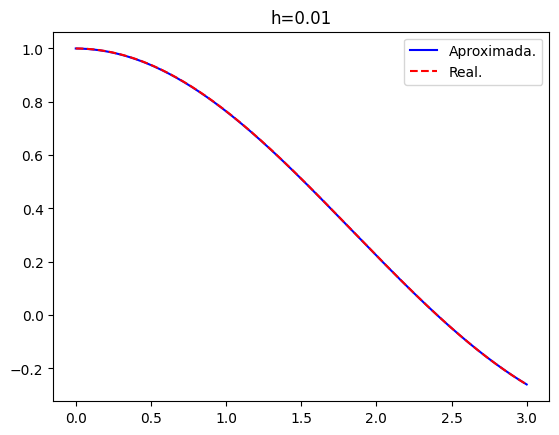

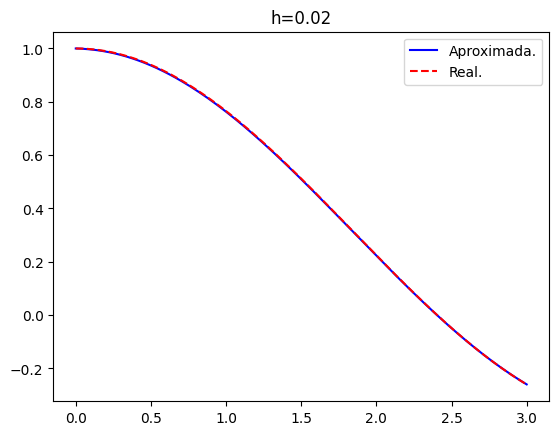

,h,J0(1),J0(3)
0,0.01,0.764497,0.762802
1,0.02,-0.259936,-0.259726


In [ ]:
# Creamos una tabla para ver los resultados.
df=pd.DataFrame()

# Si h=0.01:
h1=0.01
t1,u1 = ABM2(h1)

# Si h=0.02:
h2=0.02
t2,u2 = ABM2(h2)

# Actualizamos y mostramos los resultados.
df["h"]=[0.01,0.02]
df["J0(1)"]=[u1[100],u1[300]]
df["J0(3)"]=[u2[50],u2[150]]
display(df)

# Taller 3

## Punto 1 inciso b:

Para el siguiente esquema determine explicitamente su región de estabilidad absoluta:

> $y_{j+2}-y_j=hf_{j+1}$.

¿Será el método $A$ estable? ¿$A_0$ estable? Fundamente su respuesta. ¿Qué se puede decir sobre la convergencia de este método?

**Desarrollo:** Consideremos el PVI $y'(t)=\lambda y(t)$ con $y(\alpha)=\eta$, $\lambda<0$ y $t\in[\alpha,\beta]$. Definamos ahora a $f(t,y(t))=y'(t)=\lambda y(t)$, entonces, aplicando el esquema:

> $y_{j+2}-y_j=hf_{j+1}=h\lambda y_{j+1}$.

Considerando $\hat{h}=h\lambda$ podemos definir el siguiente polinomio asociado (también llamado el polinomio de estabilidad):

> $q(\mu,\hat{h})=\mu^2-\hat{h}\mu-1$.

El cual debe cumplir la condición de la raíz estricta, es decir, $|\mu_0|<1$ donde $\mu_0$ es una raíz de la función $q$.

Mediante la fórmula cuadrática podemos llegar a las siguientes raices:

* $\mu_1=\frac{\hat{h}+\sqrt{\hat{h}^2+4}}{2}$, así, como $|\mu_1|<1$ entonces:

> $|\frac{\hat{h}+\sqrt{\hat{h}^2+4}}{2}|<1$, así, $|\hat{h}+\sqrt{\hat{h}^2+4}|<2$, resolviendo el valor absoluto:

> $-2<\hat{h}+\sqrt{\hat{h}^2+4}<2$.

> $-2-\hat{h}<\sqrt{\hat{h}^2+4}<2-\hat{h}$.

> $(-2-\hat{h})^2<\hat{h}^2+4<(2-\hat{h})^2$.

> $4+4\hat{h}+\hat{h}^2<\hat{h}^2+4<4-4\hat{h}+\hat{h}^2$.

> $4\hat{h}<0<-4\hat{h}$.

De donde se concluye que $\hat{h}<0$.

* $\mu_2=\frac{\hat{h}-\sqrt{\hat{h}^2+4}}{2}$. Así, como $|\mu_2|<1$ entonces:

> $|\frac{\hat{h}-\sqrt{\hat{h}^2+4}}{2}|<1$, así, $|\hat{h}-\sqrt{\hat{h}^2+4}|<2$, resolviendo el valor absoluto:

> $-2<\hat{h}-\sqrt{\hat{h}^2+4}<2$.

> $-2-\hat{h}<-\sqrt{\hat{h}^2+4}<2-\hat{h}$.

> $2+\hat{h}>\sqrt{\hat{h}^2+4}>\hat{h}-2$.

> $(2+\hat{h})^2>\hat{h}^2+4>(\hat{h}-2)^2$.

> $4+4\hat{h}+\hat{h}^2>\hat{h}^2+4>4-4\hat{h}+\hat{h}^2$.

> $4\hat{h}>0>-4\hat{h}$.

De donde se concluye que $\hat{h}>0$.

Por lo tanto $\Omega_{abs}=\{\hat{h}\in\mathbb{C}:\hat{h}>0, \hat{h}<0\}=\emptyset$.

> Esto ya que recordemos que $\hat{h}=a+bi$ con $a,b\in \mathbb{R}$, así se tendría que $0<a+bi<0$, o bien, $-bi<a<-bi$, ahora elevando al cuadrado tenemos que $-b^2<a^2<-b^2$ lo cual si es absurdo en $\mathbb{R}$.

También podemos calcular $\Omega_0=\Omega_{abs}\cap\{\hat{h}=(\hat{h}_1,0)\in\mathbb{C}:\hat{h}_1<0\}=\emptyset$.

Tenemos así que el método no es ni $A$ estable y tampoco $A_0$ estable (ya que $\mathbb{C}^-\not\subset\emptyset=\Omega_{abs}$ y $\mathbb{R}^-\not\subset\emptyset=\Omega_0$).

Al tener que el método no es $A$ estable es imposible garantizar o negar la convergencia, en este caso en partícular podemos ver que el método no es consistente ya que no se cumple la segunda condición:

> $\psi_1(\mu)=\mu^2-1$.

> $\sigma_1(\mu)=\mu$.

> $\psi_2(\mu)=\mu\psi_1'(\mu)=2\mu^2$.

> $\psi_2(1)=2\neq1=\sigma_1(1)$.

Por lo tanto, el método no es convergente.

## Punto 2 inciso 2.5:

Analice la $A_0$ estabilidad del siguiente esquema:

> $2y_{j+2}-3y_{j+1}+y_j=\frac{1}{2}h(4f_{j+2}-3f_{j+1}+f_j)$, con $j\geq0$

¿Es convergente además este esquema? Si lo es, su orden de
convergencia.

**Desarrollo:** Consideremos el PVI $y'(t)=\lambda y(t)$ con $y(\alpha)=\eta$, $\lambda<0$ y $t\in[\alpha,\beta]$. Definamos ahora a $f(t,y(t))=y'(t)=\lambda y(t)$, entonces, aplicando el esquema:

> $2y_{j+2}-3y_{j+1}+y_j=\frac{1}{2}h(4\lambda y_{j+2}-3\lambda y_{j+1}+\lambda y_j)=\frac{h\lambda}{2}(4y_{j+2}-3y{j+1}+y_j)$

Así, siendo $\hat{h}=h\lambda$ y multiplicando todo por $\frac{1}{2}$, obtenemos:

> $y_{j+2}-\frac{3}{2}y_{j+1}+\frac{1}{2}y_j-\frac{\hat{h}}{4}(4y_{j+2}-3y{j+1}+y_j)=y_{j+2}-\frac{3}{2}y_{j+1}+\frac{1}{2}y_j-\hat{h}y_{j+2}+\frac{3\hat{h}}{4}y_{j+1}-\frac{\hat{h}}{4}y_j$.

De donde, al agrupar terminos semejantes:

> $(1-\hat{h})y_{j+2}+(\frac{3\hat{h}}{4}-\frac{3}{2})y_{j+1}+(\frac{1}{2}+\frac{\hat{h}}{4})y_j=(1-\hat{h})y_{j+2}+\frac{3\hat{h}-6}{4}y_{j+1}+\frac{2-\hat{h}}{4}y_j$.

Y definamos así:

> $q(\mu)=\mu^2+\frac{3\hat{h}-6}{4-4\hat{h}}\mu+\frac{2-\hat{h}}{4-4\hat{h}}$.

Usemos las condiciones de Jury para garantizar que $q(\mu)$ cumple la condición de la raíz, asi:

* $q(0)<1$:

> $q(0)=\frac{2-\hat{h}}{4-4\hat{h}}<1$, así $\frac{2-\hat{h}}{4-4\hat{h}}-1=\frac{3\hat{h}-2}{4-4\hat{h}}<0$  haciendo un estudio de los signos tenemos que:

> * $3\hat{h}-2>0$ si $\hat{h}>\frac{2}{3}$.
> * $4-4\hat{h}>0$ si $\hat{h}<1$.

> Por tanto, $q(0)>1$ si $\hat{h}\in(-\infty,\frac{2}{3})\cup(1,\infty)$.

* $q(1)>0$:

> $q(1)=1+\frac{3\hat{h}-6}{4-4\hat{h}}+\frac{2-\hat{h}}{4-4\hat{h}}=1+\frac{2\hat{h}-4}{4-4\hat{h}}=\frac{-2\hat{h}}{4-4\hat{h}}=\frac{-\hat{h}}{2-2\hat{h}}>0$. Haciendo un estudio de los signos tenemos que:

> * $-\hat{h}>0$ si $\hat{h}<0$.
> * $2-2\hat{h}>0$ si $\hat{h}<1$.

> Por tanto, $q(1)>0$ si $\hat{h}\in(-\infty,0)\cup(1,\infty)$.

* $q(-1)>0$:

> $q(-1)=1-\frac{3\hat{h}-6}{4-4\hat{h}}+\frac{2-\hat{h}}{4-4\hat{h}}=1+\frac{8-4\hat{h}}{4-4\hat{h}}=\frac{12-8\hat{h}}{4-4\hat{h}}=\frac{3-2\hat{h}}{1-\hat{h}}>0$. Haciendo un estudio de los signos tenemos que:

> * $3-2\hat{h}>0$ si $\hat{h}<\frac{3}{2}$.
> * $1-\hat{h}>0$ si $\hat{h}<1$.

> Por tanto, $q(-1)>0$ si $\hat{h}\in(-\infty,1)\cup(\frac{3}{2},\infty)$.

Ahora, podemos concluir que el método es $A_0$ estable si:

> $\hat{h}\in[(-\infty,\frac{2}{3})\cup(1,\infty)]\cap[(-\infty,0)\cup(1,\infty)]\cap[(-\infty,1)\cup(\frac{3}{2},\infty)]=(-\infty,0)\cup(\frac{3}{2},\infty)$.

Al ser el esquema $A_0$ estable se garantiza la primera condición de la consistencia y la cero estabilidad, veamos cual es su orden de consistencia para así encontrar el orden de convergencia del método:

> $\psi_{1}(\mu):=2\mu^{2}-3\mu+1$.

> $\psi_{2}(\mu):=4\mu^{2}-3\mu$.

> $\psi_{3}(\mu):=8\mu^{2}-3\mu$.

> $\psi_{4}(\mu):=16\mu^{2}-3\mu$.

> $\sigma_{1}(\mu):=2\mu^2-\frac{3}{2}\mu+\frac{1}{2}$.

> $\sigma_{2}(\mu):=4\mu^2-\frac{3}{2}\mu$.

> $\sigma_{3}(\mu):=8\mu^2-\frac{3}{2}\mu$.

Así:
> $\psi_{2}(1)=4-3=1=2-1=2-\frac{3}{2}+\frac{1}{2}=\sigma_1(1)$.

> $\psi_{3}(1)=8-3=5=2(4-\frac{3}{2})=2\sigma_2(1)$.

> $\psi_{4}(1)=16-3=13\neq\frac{39}{2}=3(8-\frac{3}{2})=3\sigma_3(1)$.

Como se observa, el método es convergente de orden 2, que corresponde al número de pasos del método (¿Siempre se cumple?).

## Punto 9:

Considere el problema de valor de contorno :

> **(P):** $-y''(t)+y(t)e^{y(t)}=1$ Con $0<t<1$, $y(0)=0$, $y(1)=-1$

Al cual se le pretende aplicar el método de disparo.

**a)** Grafique la función $\psi(s):= z(1; s) − 0, s\in[−6, 1]$. Recordar que $z(t; s)$ es la solución del
PVI asociado a (P), considerando $z'(0; s) = s$ en vez de $y(1) = 0$. ¿Se puede decir algo sobre la unicidad de la solución de (P)?

**b)** Aplique el método de disparo para determinar la(s) solucion(es) de (P). Dejar expresado
el(los) esquema(s) a resolver, e implementarlo(s). Debe resolver la ecuación no lineal por
método de:

* La secante, con tolerancia $10^{−10}$. Indicar número de iteraciones requeridas.
* Newton-Raphson, con tolerancia $10^{−10}$. Indicar número de iteraciones requeridas.

Finalmente, muestre cada solución aproximada en una misma gráfica. Puede usar la función
**ode45** de *Matlab*, si lo estima conveniente.

In [ ]:
# Librerias necesarias:
from math import exp # Usar la función exponencial.
import matplotlib.pyplot as plt # Hacer las graficas del inciso computacional.
import numpy as np # Hacer una partición de un intervalo.

## Punto 9 (Parte computacional):

Considere el problema de valor de contorno :

> **(P):** $-y''(t)+y(t)e^{y(t)}=1$ Con $0<t<1$, $y(0)=0$, $y(1)=-1$

Al cual se le pretende aplicar el método de disparo.

**a)** Grafique la función $\psi(s):= z(1; s) − 0, s\in[−6, 1]$. Recordar que $z(t; s)$ es la solución del
PVI asociado a (P), considerando $z'(0; s) = s$ en vez de $y(1) = 0$. ¿Se puede decir algo sobre la unicidad de la solución de (P)?

**b)** Aplique el método de disparo para determinar la(s) solucion(es) de (P). Dejar expresado
el(los) esquema(s) a resolver, e implementarlo(s). Debe resolver la ecuación no lineal por
método de:

* La secante, con tolerancia $10^{−10}$. Indicar número de iteraciones requeridas.
* Newton-Raphson, con tolerancia $10^{−10}$. Indicar número de iteraciones requeridas.

Finalmente, muestre cada solución aproximada en una misma gráfica. Puede usar la función
**ode45** de *Matlab*, si lo estima conveniente.

Definamos primero los datos que necesitamos durante la solución al PVF:

Como $y(0)=0$, $y(1)=-1$ y $0<t<1$ tenemos que:

> $a=0$, $b=1$.

> $\alpha=0$, $\beta=0$.

Reestructuremos así nuestro PVF a un PVI, donde:

> $y''(t)=y(t)e^{y(t)}-1$ Con $0<t<1$, $y(0)=0$, $y'(0)=s\in\mathbb{R}$.

Como $s$ es un escalar arbitrario necesitamos estimarlo, teniendo presente que $y(1,s)=-1$ donde $y(t,s)$ es la solución del sistema. Definamos así la función:

> $F(s)=y(1,s)+1\Longrightarrow F'(s)=\dfrac{\partial}{\partial s}y(1,s)$.

Para la cual debemos estimar la raíz, que es donde se cumple la igualdad anterior, para esto definamos:

> $z(t,s)=\dfrac{\partial}{\partial s}y(t,s)$.

Haciendo cortas operaciones llegamos a que:

> $z'(t,s)=\dfrac{\partial}{\partial s}y'(t,s)$.

> $z''(t,s)=\dfrac{\partial}{\partial s}y''(t,s)=\dfrac{\partial}{\partial s}[y(t)e^{y(t)}-1]$.

Además $z(a)=0$ y $z'(a)=1$.

Tomando $x_1=y,x_2=z,x_3=y',x_4=z'$ tenemos:

> $x_1(a)=0,x_2(a)=0,x_3(a)=s,x_4(a)=1$.

Por tanto, aplicando el método de Euler a las anteriores funciones:

> $x_{1,j+1}=x_{1,j}+f_1(t_j,x_{1,j})$.

> $x_{1,j+1}=x_{2,j}+f_2(t_j,x_{2,j})$.

> $x_{3,j+1}=x_{3,j}+f_3(t_j,x_{3,j})$.

> $x_{4,j+1}=x_{4,j}+f_4(t_j,x_{4,j})$.

Donde:

> $f_1(t,x_1)=x'_1=x_3$.

> $f_2(t,x_{2})=z'=x_4$.

> $f_3(t,x_{3})=y''=y(t)e^{y(t)}-1=x_1e^{x_1}-1$.

> $f_4(t_j,x_{4,j})=[e^{x_1}+x_1e^{x_1}]x_2$.

In [ ]:
# Definimos las variables:
a = 0
b = 1
alp = 0
bet = -1

# Definimos las funciones:
def f1(x1_j,x2_j,x3_j,x4_j):
  return x3_j

def f2(x1_j,x2_j,x3_j,x4_j):
  return x4_j

def f3(x1_j,x2_j,x3_j,x4_j):
  return x1_j*exp(x1_j)-1

def f4(x1_j,x2_j,x3_j,x4_j):
  return (exp(x1_j)+exp(x1_j)*x1_j)*x2_j

# Definimos la cantidad y ancho de las particiones:
N = 100
h = (b-a)/N

# Tolerancia:
tol = 10**(-10)

**a)** Realizaremos el proceso propuesto anteriormente para diferentes valores de $s\in[-6,1]$, guardando el valor de $F(s)=y(1,s)-0$ para finalmente realizar la grafica de este.

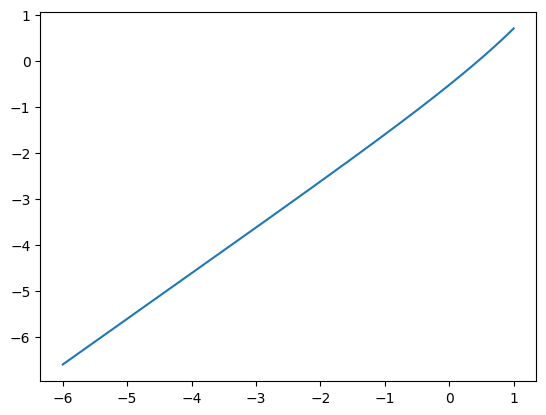

In [ ]:
# Creamos las listas:
VecS=list(np.linspace(-6,1,1000))
VecPsi=[]

# Para cada valor de s iteramos y calculamos la solución de la ecuación diferencial:
for s in VecS:
  # Inicializamos variables
  x1=[0]
  x2=[0]
  x3=[s]
  x4=[1]
  t=[a+h*j for j in range(N+1)]
  # Iteramos:
  for j in range(N):
    x1_sig = x1[j] + h * f1(x1[j],x2[j],x3[j],x4[j])
    x2_sig = x2[j] + h * f2(x1[j],x2[j],x3[j],x4[j])
    x3_sig = x3[j] + h * f3(x1[j],x2[j],x3[j],x4[j])
    x4_sig = x4[j] + h * f4(x1[j],x2[j],x3[j],x4[j])

    x1.append(x1_sig)
    x2.append(x2_sig)
    x3.append(x3_sig)
    x4.append(x4_sig)
  # Guardamos valores:
  VecPsi.append(x1[-1]-0)
# Graficamos:
plt.plot(VecS,VecPsi)
plt.show()

Como vemos, la gráfica muestra posibles soluciones no triviales $y(t)\neq0$, por lo tanto el sistema tiene única solución.

**b)** Aplicaremos el método de Newton Raphson para estimar el valor de $s$:

> $s_{r+1}=s_r-\frac{F(s_r)}{F'(s_r)}$.

Donde $s_0=\frac{b-a}{\beta-\alpha}$.

Ahora bien, aplicando el método de la secante:

> $s_{r+1}=s_r-\frac{F(s_r)[s_{r-1}-s_r]}{F(s_{r-1})-F(s_r)}$.

Donde, al necesitar dos valores iniciales:

> $s_0=\frac{b-a}{\beta-\alpha}$.

> $s_1=2s_0$.

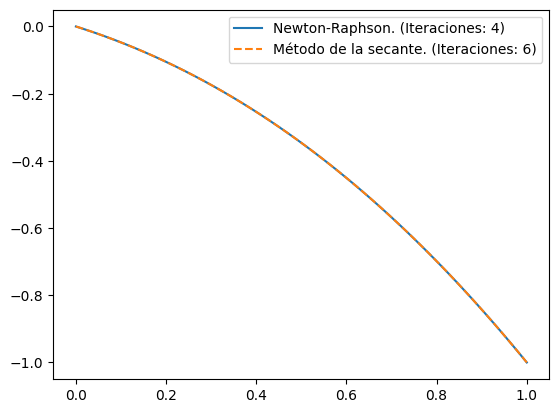

In [ ]:
# Método Newton Raphson.
# Inicializamos el valor inicial de s
s_0 = (b-a)/(bet-alp)
S=[s_0]
error=float("inf") # Aplicamos un error muy grande.

# Conteo de iteraciones.
iterNR=0
iterSec=0

# Aplicamos el método recalculando s hasta que el error sea el deseado:
while error>tol:
  # Inicializamos variables.
  x1=[0]
  x2=[0]
  x3=[S[-1]]
  x4=[1]
  t=[a+h*j for j in range(N+1)]
  # Iteramos.
  for j in range(N):
    x1_sig = x1[j] + h * f1(x1[j],x2[j],x3[j],x4[j])
    x2_sig = x2[j] + h * f2(x1[j],x2[j],x3[j],x4[j])
    x3_sig = x3[j] + h * f3(x1[j],x2[j],x3[j],x4[j])
    x4_sig = x4[j] + h * f4(x1[j],x2[j],x3[j],x4[j])

    x1.append(x1_sig)
    x2.append(x2_sig)
    x3.append(x3_sig)
    x4.append(x4_sig)
  #Guardamos valores y recalculamos s.
  F_k = x1[-1]-bet
  F_k_der = x2[-1]

  s_j = S[-1] - (F_k/F_k_der)
  S.append(s_j)

  iterNR+=1
  error = abs(S[-1]-S[-2])

# Graficamos
plt.plot(t,x1)

# Realizamos el mismo proceso para el método de la secante:
s_0 = (b-a)/(bet-alp)
S=[s_0]
error=float("inf")
s_1 = 2 * s_0
F_k = []

while error>tol:

  x1=[0]
  x2=[0]
  x3=[S[-1]]
  x4=[1]
  t=[a+h*j for j in range(N+1)]

  for j in range(N):
    x1_sig = x1[j] + h * f1(x1[j],x2[j],x3[j],x4[j])
    x2_sig = x2[j] + h * f2(x1[j],x2[j],x3[j],x4[j])
    x3_sig = x3[j] + h * f3(x1[j],x2[j],x3[j],x4[j])
    x4_sig = x4[j] + h * f4(x1[j],x2[j],x3[j],x4[j])

    x1.append(x1_sig)
    x2.append(x2_sig)
    x3.append(x3_sig)
    x4.append(x4_sig)

  F_k.append(x1[-1]-bet)
  if len(S)<2:
    s_j = 2 * S[-1]
  else:
    s_j = S[-1] - ((S[-1]-S[-2])/(F_k[-1]-F_k[-2])) * F_k[-1]
  S.append(s_j)

  error = abs(S[-1]-S[-2])
  iterSec+=1

# Mostramos la grafica:
plt.plot(t,x1,"--")
plt.legend([f"Newton-Raphson. (Iteraciones: {iterNR})",f"Método de la secante. (Iteraciones: {iterSec})"])
plt.show()

## Consistencia:

Ya que definimos:

$\psi(\mu)=\sum_{m=0}^r\alpha_m\mu^m$.

$\sigma(\mu)=\sum_{m=0}^r\beta_mf_{j+m}$.

Tenemos que:

$\psi(\mu)=\psi_1(\mu)=\mu^2+\mu+\alpha$.

$\sigma(\mu)=\sigma_1(\mu)=\mu^2+\beta$

Para verificar si el sistema es consistente de orden $k$ se debe cumplir dos condiciones:

1. $\psi_1(1)=0$.  

2.  Para $j\in\{1,...,k\}, \psi_{j+1}(1)=j\sigma_j(1)$.

Veamos que se cumple la condición 1:

$\psi_1(1)=(1)^2+(1)+\alpha=0$, esto nos indica que $\alpha=-2$.

Para comprobar la condición 2 recordemos que $\psi_{j+1}(\mu)=\mu\psi_j'$ y $\sigma_{j+1}(\mu)=\mu\sigma_j'$. Así:

$\psi_2(\mu)=\mu(2\mu+1)=2\mu^2+\mu$.

Entonces se debe cumplir que $\psi_2(1)=\sigma_1(1)$:

$\psi_2(1)=(2+1)=1+\beta=\sigma_1(1)$, de esta igualdad tenemos que $\beta=2$.

Ahora, tenemos que el sistemas es consistente de al menos orden 1, veamos si resulta consistente de orden 2, calculemos:

$\sigma_2(\mu)=2\mu^2$.

$\psi_3(\mu)=\mu(4\mu+1)=4\mu^2+\mu$

Ahora se debe cumplir que $\psi_3(1)=2\sigma_2(1)$:

$\psi_3(1)=(4+1)=5\neq4=2\sigma_2(1)$.

Así tenemos que el sistema es consistente de orden 1 ya que no cumple la condición a partir del orden 2.

# Cero estable:

Sea $q$ un polinomio. Se dice que $q$ satisface el criterio de la raíz si todas sus raíces caen dentro o sobre el círculo unitario, siendo aquellas que caen en la circunferencia unitaria, raíces simples. Es decir:

a) $\forall \mu \in \mathbb{C}: q(\mu)=0 \Rightarrow|\mu| \leq 1$,

b) $\forall \mu \in \mathbb{C}: q(\mu)=0:\left(|\mu|=1 \Rightarrow q^{\prime}(\mu) \neq 0\right)$.

El método multipaso se dice que es cero-estable si su primer polinomio característico, $\psi_1$, satisface la condición de la raíz.

Utilizando la formula cuadrática sobre el polinomio $\psi_1(\mu)=\mu^2+\mu+\alpha$., llegamos a que las raices de este son $\frac{-1+\sqrt{1-4\alpha}}{2}$ y $\frac{-1-\sqrt{1-4\alpha}}{2}$. Despejando los valores en que debe estar $\alpha$ para que la satisfaga, llegamos a que $\alpha\in[-2,0]$.

# Convergencia:

Para que sea convergente es necesario que sea cero estable y consistente, cabe resaltar que se conserva el orden de consistencia, así, el sistema es convergente cuando $\alpha=-2$ ya que es cero estable y consistente.

Como se nota en esta parte, se da respuesta positiva al inciso d, ya que en más alto orden de consistencia es 1 y ahí el sistema es convergente.

In [ ]:
# Importamos libreria:
from sympy import *

In [ ]:
# Definimos los simbolos
x = symbols('x')
b = symbols('b')

# Definimos las funciones:
psi_1 = x**2 + (b-1)*x - b
sigma_1 = ((b+3)/4)*x**2 + (3*b+1)/4

# Generamos listas para guardar los valores de las funciones:
psiFuncs = [psi_1]
sigmaFuncs = [sigma_1]
orden=0

In [ ]:
# Consistencia:
while True:
  # Evaluamos la primera condición:
  if psiFuncs[0].subs(x,1) != 0:
    break

  # Evaluamos la segunda condición:
  # Sacamos las funciones anteriores:
  psi_j = psiFuncs[-1]
  sigma_j = sigmaFuncs[-1]

  # Se calcula el siguiente de psi_j:
  psi_j_1 = x*diff(psi_j,x)
  print("si",psi_j_1)

  # Evaluamos si falla la condición de consistencia para el orden (orden+1):
  #if round(psi_j_1.subs(x,1),2) != round((orden+1)*sigma_j.subs(x,1),2):
  if psi_j_1.subs(x,1) != (orden+1)*sigma_j.subs(x,1):
    break
  else:
    # Como cumple la condición de consistencia actualizamos la variable:
    orden = orden + 1

    # Calculamos el siguiente de sigma_j:
    sigma_j_1 = x*diff(sigma_j,x)
    print("sigma",sigma_j_1)
    sigmaFuncs.append(sigma_j_1)
    psiFuncs.append(psi_j_1)

print(f"El método es de orden {orden}")

si x*(b + 2*x - 1)
sigma 2*x**2*(b/4 + 3/4)
si x*(b + 4*x - 1)
sigma 4*x**2*(b/4 + 3/4)
si x*(b + 8*x - 1)
El método es de orden 2


In [ ]:
# Cero estable:
raices=solve(psi_1,x)
cero_estable=True
for raiz in raices:
  if abs(raiz)<=1:
    print(f"La raíz {raiz} se encuentra dentro o sobre el círculo unitario.")
  else:
    print(f"La raíz {raiz} no se encuentra dentro o sobre el círculo unitario.")
    cero_estable=False
print(f"Cero estable: {cero_estable}")

La raíz 1 se encuentra dentro o sobre el círculo unitario.
Cero estable: True


In [ ]:
# Librerias necesarias:

In [ ]:
# Librerias necesarias:
from math import exp # Usar la función exponencial.
import matplotlib.pyplot as plt # Hacer las graficas del inciso computacional.
import numpy as np # Hacer una partición de un intervalo.
from sympy import * # Manejo de ecuaciones.

# Taller 4:

## Ejercicio 2 inciso e:

En lo que sigue suponga que $u$ es una función suficientemente suave en un intervalo que contiene al punto $t$. Considere $h > 0$ tal que $t+jh\in Dom(u)$, con $j\in \{−3, −2, −1, 0, 1, 2, 3, 4\}$. Haciendo
expansión en serie de Taylor apropiadamente, deduzca qué derivada en $t$ de $u$ aproxima el siguiente cuociente de diferencia, y con qué orden de aproximación:

> $\frac{1}{h}\{-2u(t)+5u(t-h)-4u(t-2h)+u(t-3h)\}$.

Iniciemos expandiendo $u$ en series de Taylor alrededor del punto t:

* $u(t-h)=u(t)-hu'(t)+\frac{h^2u''(t)}{2!}-\frac{h^3u^{(3)}(t)}{3!}+\frac{h^4u^{(4)}(t)}{4!}-\frac{h^5u^{(5)}(t)}{5!}+O(h^6)$.

* $u(t-2h)=u(t)-2hu'(t)+\frac{4h^2u''(t)}{2!}-\frac{8h^3u^{(3)}(t)}{3!}+\frac{16h^4u^{(4)}(t)}{4!}-\frac{32h^5u^{(5)}(t)}{5!}+O(h^6)$.

* $u(t-3h)=u(t)-3hu'(t)+\frac{9h^2u''(t)}{2!}-\frac{27h^3u^{(3)}(t)}{3!}+\frac{81h^4u^{(4)}(t)}{4!}-\frac{243h^5u^{(5)}(t)}{5!}+O(h^6)$.

Multiplicando la primera expresión por $5$ y simplificando nos queda:

> $5u(t-h)=5u(t)-5hu'(t)+\frac{5h^2u''(t)}{2}-\frac{5h^3u^{(3)}(t)}{6}+\frac{5h^4u^{(4)}(t)}{24}-\frac{h^5u^{(5)}(t)}{24}+O(h^6)$.

Multiplicando la segunda expresión por $-4$ y simplificando nos queda:

> $-4u(t-2h)=-4u(t)+8hu'(t)-8h^2u''(t)+\frac{16h^3u^{(3)}(t)}{3}-\frac{8h^4u^{(4)}(t)}{3}+\frac{16h^5u^{(5)}(t)}{15}-O(h^6)$.

Ahora simplificando la tercera expresión nos queda:

> $u(t-3h)=u(t)-3hu'(t)+\frac{9h^2u''(t)}{2}-\frac{9h^3u^{(3)}(t)}{2}+\frac{27h^4u^{(4)}(t)}{8}-\frac{81h^5u^{(5)}(t)}{40}+O(h^6)$.

Tenemos así que:

> $\frac{1}{h}\{-2u(t)+5u(t-h)-4u(t-2h)+u(t-3h)\}=-hu''(t)+\frac{11}{12}h^3u^{(4)}(t)-h^4u^{(5)}(t)+O(h^5)$

Ya que:

> $\frac{1}{h}\{-2u(t)+5u(t-h)-4u(t-2h)+u(t-3h)\}$


>$=\frac{1}{h}\{-2u(t)+5u(t)-5hu'(t)+\frac{5h^2u''(t)}{2}-\frac{5h^3u^{(3)}(t)}{6}+\frac{5h^4u^{(4)}(t)}{24}-\frac{h^5u^{(5)}(t)}{24}-4u(t)+8hu'(t)-8h^2u''(t)+\frac{16h^3u^{(3)}(t)}{3}-\frac{8h^4u^{(4)}(t)}{3}+\frac{16h^5u^{(5)}(t)}{15}+u(t)-3hu'(t)+\frac{9h^2u''(t)}{2}-\frac{9h^3u^{(3)}(t)}{2}+\frac{27h^4u^{(4)}(t)}{8}-\frac{81h^5u^{(5)}(t)}{40}+O(h^6)\}$.

>$=\frac{1}{h}\{-2u(t)+5u(t)-4u(t)+u(t)-5hu'(t)+8hu'(t)-3hu'(t)+\frac{5h^2u''(t)}{2}+\frac{9h^2u''(t)}{2}-8h^2u''(t)-\frac{5h^3u^{(3)}(t)}{6}+\frac{16h^3u^{(3)}(t)}{3}-\frac{9h^3u^{(3)}(t)}{2}-\frac{8h^4u^{(4)}(t)}{3}+\frac{5h^4u^{(4)}(t)}{24}+\frac{27h^4u^{(4)}(t)}{8}-\frac{h^5u^{(5)}(t)}{24}+\frac{16h^5u^{(5)}(t)}{15}-\frac{81h^5u^{(5)}(t)}{40}+O(h^6)\}$.

>$=\frac{1}{h}\{(-2+5-4+1)u(t)+(-5+8-3)hu'(t)+(\frac{5}{2}+\frac{9}{2}-8)h^2u''(t)+(-\frac{5}{6}+\frac{16}{3}-\frac{9}{2})h^3u^{(3)}(t)+(-\frac{8}{3}+\frac{5}{24}+\frac{27}{8})h^4u^{(4)}(t)+(-\frac{1}{24}+\frac{16}{15}-\frac{81}{40})h^5u^{(5)}(t)+O(h^6)\}$.

>$=\frac{1}{h}\{-h^2u''(t)+\frac{11}{12}h^4u^{(4)}(t)-h^5u^{(5)}(t)+O(h^6)\}=-hu''(t)+\frac{11}{12}h^3u^{(4)}(t)-h^4u^{(5)}(t)+O(h^5)$.

Ahora bien, como se puede notar, la derivada que aproxima el sistema es $u''(t)$, así:

> $-\frac{1}{h}\{-2u(t)+5u(t-h)-4u(t-2h)+u(t-3h)\}-hu''(t)=-\frac{11}{12}h^3u^{(4)}(t)+h^4u^{(5)}(t)+O(h^5)$.

Dividiendo todo por $h$ obtenemos:

> $-\frac{1}{h^2}\{-2u(t)+5u(t-h)-4u(t-2h)+u(t-3h)\}-u''(t)=-\frac{11}{12}h^2u^{(4)}(t)+h^3u^{(5)}(t)+O(h^4)$.

Se concluye así que la derivada que aproxima el sistema es $u''(t)$ y lo hace con orden de aproximación $O(h^2)$.

## Ejercicio 5 inciso (ii).

Resuelva el siguiente problema, aplicando el método de diferencias finitas:

> $−u''(x) + xu(x) = (1 + 2x − x^2) e^x$, con condiciones de contorno $u(0) = 1$, $u'(1) = −e$,

considerando partición uniforme de $[0, 1]$ con tamaño de paso $h =
\frac{1}{N+1}$. La solución exacta es $u(x) = (1 − x) e^x$. Aproximar $u''$ por diferencia centrada (de segundo orden), y la condición de contorno $u'(1)$ por:

> El cociente de diferencias $\frac{1}{h}\{−2U_{N+1} + 5U_N − 4U_{N−1} + U_{N−2}\}$.

Iniciemos despejando el valor de $u''(x)$ de la ecuación diferencial dada:

> $−u''(x) + xu(x) = (1 + 2x − x^2) e^x$.

> $u''(x) =xu(x) - (1 + 2x − x^2) e^x$.

Ahora, considerando los valores iniciales, tenemos que:
> $a = 0$.

> $b=1$.

En la discretización del intervalo $[0,1]$ tomamos $N+1$ particiones, en este caso tomaremos $N=100$.

Así, $u_0=u(t_0)=u(0)=1$ y $h=\frac{b-a}{N+1}$.

In [ ]:
# Datos:
a = 0
b = 1
N = 100
# Datos calculados:
h = (b-a)/(N+1)

Gracias a las condiciones de frontera conocemos los valores de $u_0$ y $u_{N+1}$, así, nuestras incognitas serán $u_1,u_2,...,u_N$, por tanto sabemos que esta será la dimensión de la matriz de coeficientes $A$ y el número de filas del vector de resultados $B$.

Ahora, hagamos un estudio de las aproximaciones de $u''$ usando el cociente de diferencias $\frac{1}{h}\{−2U_{N+1} + 5U_N − 4U_{N−1} + U_{N−2}\}$, recordemos que solo podremos estudiar desde $u_2$ hasta $u_N$ para evitar crear nodos fantasmas.

**Para $j=2$:**

> $u''(t_2)=\frac{1}{h}\{−2u_3 + 5u_2 − 4u_1 + u_0\}$, además,

>$u''(t_2)=t_2u_2 - (1 + 2t_2 − t_2^2) e^{t_2}$, así, igualando y despejando:

> $− \frac{4}{h}u_1 + (\frac{5}{h}-t_2)u_2 - \frac{2}{h}u_3 = - (1 + 2t_2 − t_2^2) e^{t_2}-\frac{1}{h}u_0$.

Obteniendo así la primera fila de la matríz y del vector de resultados.

\begin{equation}
  A=\begin{pmatrix}
    − \frac{4}{h} & \frac{5}{h}-t_2 & -\frac{2}{h} & 0 & 0 & \cdots & 0\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0\\
    \vdots & \vdots & \vdots &\vdots & \vdots & \ddots & \vdots\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0
  \end{pmatrix}
\end{equation}

\begin{equation}
  B=\begin{pmatrix}
    - (1 + 2t_2 − t_2^2) e^{t_2}-\frac{1}{h}u_0\\
    0\\
    0\\
    \vdots\\
    0\\
    0
  \end{pmatrix}
\end{equation}

**Para $j=3$:**

> $u''(t_3)=\frac{1}{h}\{−2u_4 + 5u_3 − 4u_2 + u_1\}$, además,

>$u''(t_3)=t_3u_3 - (1 + 2t_3 − t_3^2) e^{t_3}$, así, igualando y despejando:

> $\frac{1}{h}u_1 - \frac{4}{h}u_2 + (\frac{5}{h}-t_3)u_3 − \frac{2}{h}u_4 = - (1 + 2t_3 − t_3^2) e^{t_3}$.

Obteniendo así la segunda fila de la matríz y del vector de resultados.

\begin{equation}
  A=\begin{pmatrix}
    − \frac{4}{h} & \frac{5}{h}-t_2 & -\frac{2}{h} & 0 & 0 & \cdots & 0\\
    \frac{1}{h} & - \frac{4}{h} & \frac{5}{h}-t_3 & − \frac{2}{h} & 0 & \cdots & 0\\
    \vdots & \vdots & \vdots &\vdots & \vdots & \ddots & \vdots\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0
  \end{pmatrix}
\end{equation}

\begin{equation}
  B=\begin{pmatrix}
    - (1 + 2t_2 − t_2^2) e^{t_2}-\frac{1}{h}u_0\\
    - (1 + 2t_3 − t_3^2) e^{t_3}\\
    0\\
    \vdots\\
    0\\
    0
  \end{pmatrix}
\end{equation}

**Para $j=4$:**


> $u''(t_4)=\frac{1}{h}\{−2u_5 + 5u_4 − 4u_3 + u_2\}$, además,

>$u''(t_4)=t_4u_4 - (1 + 2t_4 − t_4^2) e^{t_4}$, así, igualando y despejando:

> $\frac{1}{h}u_2 - \frac{4}{h}u_3 + (\frac{5}{h}-t_4)u_4 − \frac{2}{h}u_5 = - (1 + 2t_4 − t_4^2) e^{t_4}$.

Obteniendo así la tercera fila de la matríz y del vector de resultados.

\begin{equation}
  A=\begin{pmatrix}
    − \frac{4}{h} & \frac{5}{h}-t_2 & -\frac{2}{h} & 0 & 0 & \cdots & 0\\
    \frac{1}{h} & - \frac{4}{h} & \frac{5}{h}-t_3 & − \frac{2}{h} & 0 & \cdots & 0\\
    0 & \frac{1}{h} & - \frac{4}{h} & \frac{5}{h}-t_4 & − \frac{2}{h} & \cdots & 0\\
    \vdots & \vdots & \vdots &\vdots & \vdots & \ddots & \vdots\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0
  \end{pmatrix}
\end{equation}

\begin{equation}
  B=\begin{pmatrix}
    - (1 + 2t_2 − t_2^2) e^{t_2}-\frac{1}{h}u_0\\
    - (1 + 2t_3 − t_3^2) e^{t_3}\\
    - (1 + 2t_4 − t_4^2) e^{t_4}\\
    \vdots\\
    0\\
    0
  \end{pmatrix}
\end{equation}

Así, **para $j\in[3,N-1]$**:

> $u''(t_j)=\frac{1}{h}\{−2u_{j+1} + 5u_j − 4u_{j-1} + u_{j-2}\}$, además,

>$u''(t_j)=t_ju_j - (1 + 2t_j − t_j^2) e^{t_j}$, así, igualando y despejando:

> $\frac{1}{h}u_{j-2} - \frac{4}{h}u_{j-1} + (\frac{5}{h}-t_j)u_j − \frac{2}{h}u_{j+1} = - (1 + 2t_j − t_j^2) e^{t_j}$.


Ahora, para llenar las ultimas dos filas de la matriz recordemos que:

> $-e=u'(1)=u'(t_{N+1})\approx\frac{u_{N+1}-u_N}{h}$, así $u_{N+1}\approx -eh+u_N$.

> $-e=u'(1)=u'(t_{N+1})\approx\frac{u_{N+2}-u_{N+1}}{h}$, así $u_{N+2}\approx -eh+u_{N+1}\approx -2eh+u_N$.

Así, **para $j=N$**:

> $u''(t_N)=\frac{1}{h}\{−2u_{N+1} + 5u_N − 4u_{N-1} + u_{N-2}\}=\frac{1}{h}\{2eh+3u_N − 4u_{N-1} + u_{N-2}\}$, además,

>$u''(t_N)=t_Nu_N - (1 + 2t_N − t_N^2) e^{t_N}$, así, igualando y despejando:

> $\frac{1}{h}u_{N-2} - \frac{4}{h}u_{N-1} + (\frac{3}{h}-t_N)u_N = - (1 + 2t_N − t_N^2) e^{t_N}-2e$.

Obteniendo así la penultima fila de la matríz y del vector de resultados.

\begin{equation}
  A=\begin{pmatrix}
    − \frac{4}{h} & \frac{5}{h}-t_2 & -\frac{2}{h} & 0 & 0 & \cdots & 0\\
    \frac{1}{h} & - \frac{4}{h} & \frac{5}{h}-t_3 & − \frac{2}{h} & 0 & \cdots & 0\\
    0 & \frac{1}{h} & - \frac{4}{h} & \frac{5}{h}-t_4 & − \frac{2}{h} & \cdots & 0\\
    \vdots & \vdots & \vdots &\vdots & \vdots & \ddots & \vdots\\
    0 & 0 & 0 & 0 & 0 & \cdots & \frac{3}{h}-t_N\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0
  \end{pmatrix}
\end{equation}

\begin{equation}
  B=\begin{pmatrix}
    - (1 + 2t_2 − t_2^2) e^{t_2}-\frac{1}{h}u_0\\
    - (1 + 2t_3 − t_3^2) e^{t_3}\\
    - (1 + 2t_4 − t_4^2) e^{t_4}\\
    \vdots\\
    - (1 + 2t_N − t_N^2) e^{t_N}-2e\\
    0
  \end{pmatrix}
\end{equation}

Además, **para $j=N+1$**:

> $u''(t_{N+1})=\frac{1}{h}\{−2u_{N+2} + 5u_{N+1} − 4u_{N} + u_{N-1}\}=\frac{1}{h}\{−2(-2eh+u_N) + 5(-eh+u_N) − 4u_{N} + u_{N-1}\}=\frac{1}{h}\{4eh-2u_N - 5eh+5u_N − 4u_{N} + u_{N-1}\}=\frac{1}{h}\{-eh-u_N + u_{N-1}\}$.

Además,

>$u''(t_{N+1})=t_{N+1}u_{N+1} - (1 + 2t_{N+1} − t_{N+1}^2) e^{t_{N+1}} =t_{N+1}(-eh+u_N) - (1 + 2t_{N+1} − t_{N+1}^2) e^{t_{N+1}}=-t_{N+1}eh+t_{N+1}u_N - (1 + 2t_{N+1} − t_{N+1}^2) e^{t_{N+1}}$.

Así, igualando y despejando:

> $-(\frac{1}{h}+t_{N+1})u_N + \frac{1}{h}u_{N-1}=(-t_{N+1}h+1)e - (1 + 2t_{N+1} − t_{N+1}^2) e^{t_{N+1}}$.

Obteniendo así la última fila de la matríz y del vector de resultados.

\begin{equation}
  A=\begin{pmatrix}
    − \frac{4}{h} & \frac{5}{h}-t_2 & -\frac{2}{h} & 0 & 0 & \cdots & 0\\
    \frac{1}{h} & - \frac{4}{h} & \frac{5}{h}-t_3 & − \frac{2}{h} & 0 & \cdots & 0\\
    0 & \frac{1}{h} & - \frac{4}{h} & \frac{5}{h}-t_4 & − \frac{2}{h} & \cdots & 0\\
    \vdots & \vdots & \vdots &\vdots & \vdots & \ddots & \vdots\\
    0 & 0 & 0 & 0 & 0 & \cdots & \frac{3}{h}-t_N\\
    0 & 0 & 0 & 0 & 0 & \cdots & -(\frac{1}{h}+t_{N+1})
  \end{pmatrix}
\end{equation}

\begin{equation}
  B=\begin{pmatrix}
    - (1 + 2t_2 − t_2^2) e^{t_2}-\frac{1}{h}u_0\\
    - (1 + 2t_3 − t_3^2) e^{t_3}\\
    - (1 + 2t_4 − t_4^2) e^{t_4}\\
    \vdots\\
    - (1 + 2t_N − t_N^2) e^{t_N}-2e\\
    (-t_{N+1}h+1)e - (1 + 2t_{N+1} − t_{N+1}^2) e^{t_{N+1}}
  \end{pmatrix}
\end{equation}


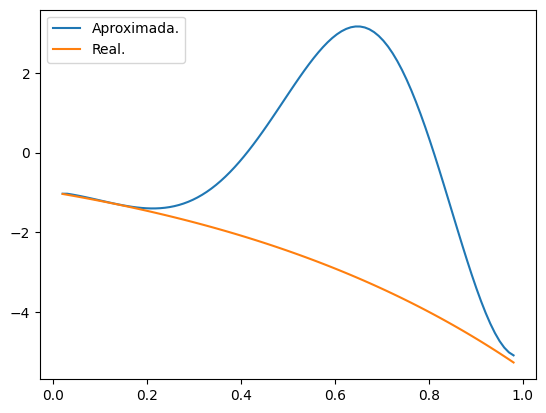

Resultados: 
DOF: 100.
h: 0.009900990099009901. 
||u_h-phi_h||_inf: 6.38000113905007.
r_inf(u): 2.368327756130384e-12.
||u_h-phi_h||_2: 33.9328079441889.
r_2(u): 6.843838169634997e-12.
||u_h-phi_h||_1: 245.829740082184.
r_1(u): 4.846856249685061e-11.
Cond_inf(A_h): 13224.236722733294.
r_inf: 2.368327756130384e-12.
Cond_2(A_h): 48020.125899987004.
r_2: 6.843838169634997e-12.
Cond_1(A_h): 48020.125899987004.
r_1: 4.846856249685061e-11


In [ ]:
def Aproximacion(h):
  # Datos:
  a = 0
  b = 1
  N = int(((b-a)/h)-1)
  u_0 = 1

  # Datos calculados:
  t = np.linspace(a,b,N+2) # El valor final ya que se busca incluir t_N+1.
  # Matriz de coeficientes:
  A = np.zeros((N,N))
  # Vector de resultados:
  B = np.zeros((N,1))

  # Rellenamos la primera fila.
  A[0,0] = -4/h
  A[0,1] = 5/h-t[2]
  A[0,2] = -2/h
  B[0,0] = -(1+2*t[2]-t[2]**2)*exp(t[2])-(u_0/h)

  # Rellenamos las filas del medio.
  for j in range(2,N-1):
    A[j-1,j-2]=1/h
    A[j-1,j-1]=-4/h
    A[j-1,j]=5/h-t[j]
    A[j-1,j+1]=-2/h
    B[j-1,0]=-(1+2*t[j]-t[j]**2)*exp(t[j])

  # Rellenamos las últimas dos filas.
  A[N-2,N-3] = 1
  A[N-2,N-2] = -4/h
  A[N-2,N-1] = 3/h-t[N]
  B[N-2,0] = -(1+2*t[N]-t[N]**2)*exp(t[N])-(2*exp(1))

  A[N-1,N-2] = 1/h
  A[N-1,N-1] = -(1/h+t[N+1])
  B[N-1,0] = (-t[N+1]*h+1)*exp(1)-(1+2*t[N+1]-t[N+1]**2)*exp(t[N+1])
  # Calculamos la inversa de A.
  AInv=np.linalg.inv(A)

  # Creamos y llenamos el vector de las variables u_j.
  U=np.zeros(N+1)
  U[0]=u_0
  U[1:]=np.dot(AInv,B).T

  # Aproximamos el valor de u''(t_j).
  AproxDobDerU=np.zeros(N-2)
  for j in range(2,N):
    AproxDobDerU[j-2]=1/h*(-2*U[j+1]+5*U[j]-4*U[j-1]+U[j-2])

  # Calculo la derivada original.
  x=symbols("x")
  u=(exp(x)-x*exp(x))
  uDer= diff(u,x)
  uDerDer= diff(uDer,x)
  DobDerU=np.array([uDerDer.subs(x,t_j) for t_j in t[2:N]])

  plt.plot(t[2:N],AproxDobDerU)
  plt.plot(t[2:N],DobDerU)
  plt.legend(("Aproximada.","Real."))
  plt.show()

  # Calculamos y mostramos los valores de la tabla.
  r=B - np.dot(A,np.dot(AInv,B))
  error_Trun=np.dot(A,np.dot(AInv,B))-B

  Norm_inf=np.linalg.norm(AproxDobDerU-DobDerU,np.inf)
  r_infU=np.linalg.norm(error_Trun,np.inf)
  # Calculamos norma 2:
  Norm_2=0
  for i in AproxDobDerU-DobDerU:
    Norm_2+=i**2
  Norm_2=sqrt(Norm_2)
  r_2U=np.linalg.norm(error_Trun)
  Norm_1=np.linalg.norm(AproxDobDerU-DobDerU,1)
  r_1U=np.linalg.norm(error_Trun,1)
  cond_inf=np.linalg.norm(A,np.inf)*np.linalg.norm(AInv,np.inf)
  r_inf=np.linalg.norm(r,np.inf)
  cond_2=np.linalg.norm(A)*np.linalg.norm(AInv)
  r_2=np.linalg.norm(r)
  cond_1=np.linalg.norm(A)*np.linalg.norm(AInv)
  r_1=np.linalg.norm(r,1)



  print(f"Resultados: \nDOF: {N}.\nh: {h}. \n||u_h-phi_h||_inf: {Norm_inf}.\nr_inf(u): {r_infU}.\n||u_h-phi_h||_2: {Norm_2}.\nr_2(u): {r_2U}.\n||u_h-phi_h||_1: {Norm_1}.\nr_1(u): {r_1U}.\nCond_inf(A_h): {cond_inf}.\nr_inf: {r_inf}.\nCond_2(A_h): {cond_2}.\nr_2: {r_2}.\nCond_1(A_h): {cond_1}.\nr_1: {r_1}")

Aproximacion(h) # Para partición de N=100.

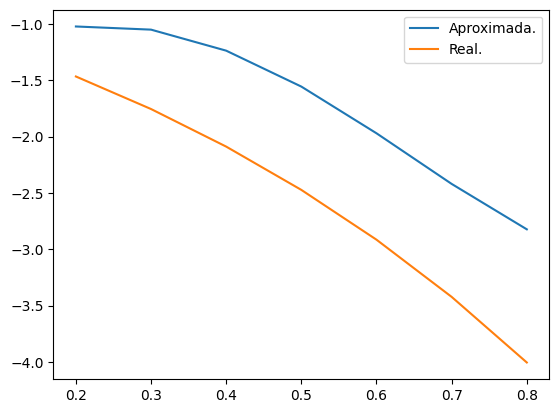

Resultados: 
DOF: 9.
h: 0.1. 
||u_h-phi_h||_inf: 1.18272550121977.
r_inf(u): 2.842170943040401e-14.
||u_h-phi_h||_2: 2.35841827168760.
r_2(u): 3.5626916741427515e-14.
||u_h-phi_h||_1: 6.05063873802576.
r_1(u): 7.105427357601002e-14.
Cond_inf(A_h): 158.13603338429428.
r_inf: 2.842170943040401e-14.
Cond_2(A_h): 183.72452991564455.
r_2: 3.5626916741427515e-14.
Cond_1(A_h): 183.72452991564455.
r_1: 7.105427357601002e-14



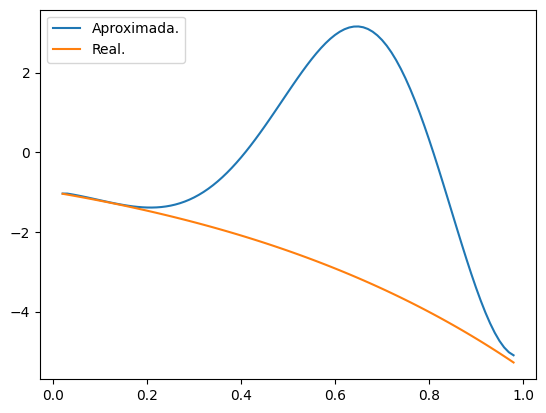

Resultados: 
DOF: 99.
h: 0.01. 
||u_h-phi_h||_inf: 6.35941188723795.
r_inf(u): 2.76534350973634e-12.
||u_h-phi_h||_2: 33.7496593138557.
r_2(u): 7.1407072169272635e-12.
||u_h-phi_h||_1: 244.110814221928.
r_1(u): 4.71680472458047e-11.
Cond_inf(A_h): 13033.539718237143.
r_inf: 2.76534350973634e-12.
Cond_2(A_h): 47046.729140011805.
r_2: 7.1407072169272635e-12.
Cond_1(A_h): 47046.729140011805.
r_1: 4.71680472458047e-11



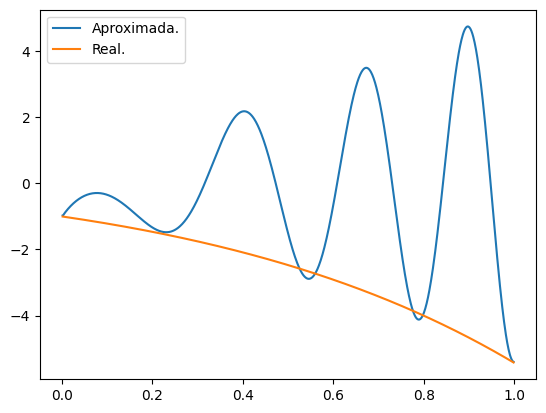

Resultados: 
DOF: 999.
h: 0.001. 
||u_h-phi_h||_inf: 9.40511680993742.
r_inf(u): 1.0900613744979637e-10.
||u_h-phi_h||_2: 114.737064700549.
r_2(u): 5.853626208649185e-10.
||u_h-phi_h||_1: 2558.41911882346.
r_1(u): 1.2806060434300548e-08.
Cond_inf(A_h): 609813.5835815346.
r_inf: 1.0900613744979637e-10.
Cond_2(A_h): 5399730.143176276.
r_2: 5.853626208649185e-10.
Cond_1(A_h): 5399730.143176276.
r_1: 1.2806060434300548e-08



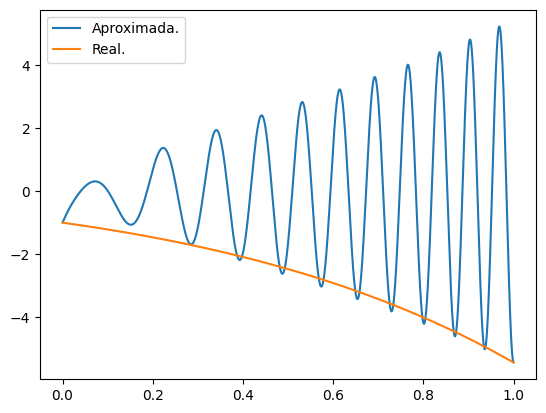

Resultados: 
DOF: 9999.
h: 0.0001. 
||u_h-phi_h||_inf: 10.4051770798762.
r_inf(u): 3.5257157193768762e-09.
||u_h-phi_h||_2: 369.539076758396.
r_2(u): 4.683128263839288e-08.
||u_h-phi_h||_1: 26968.0109805582.
r_1(u): 3.2229181849974253e-06.
Cond_inf(A_h): 24583633.07756922.
r_inf: 3.5257157193768762e-09.
Cond_2(A_h): 573950570.959571.
r_2: 4.683128263839288e-08.
Cond_1(A_h): 573950570.959571.
r_1: 3.2229181849974253e-06



In [ ]:
for h in [10**(-1),10**(-2),10**(-3),10**(-4)]:
  Aproximacion(h)
  print()

Para el valor $h=10^{-5}$ se necesita encontrar la inversa de una matriz de más de $9999x9999$, el coste computacional es demasiado elevado como para que un entorno de ejecución logre correrlo en un tiempo considerable.

Cabe resaltar que para calcular $h=10^{-4}$ se necesitan aproximadamente  minutos y 18 segundos de computo:

image.png